<a href="https://colab.research.google.com/github/jaiswalgaurav012002/Undergraduate-research-course-/blob/main/interim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install tensorflow scikit-learn
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [3]:
import tensorflow
import keras, pandas, matplotlib, numpy

In [4]:
import os

# Print the contents of the current directory
print(os.listdir())

['.config', 'Airline_Delay_Cause.csv', 'sample_data']


In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/Airline_Delay_Cause.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56042 entries, 0 to 56041
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 56042 non-null  int64  
 1   month                56042 non-null  int64  
 2   carrier              56042 non-null  object 
 3   carrier_name         56042 non-null  object 
 4   airport              56042 non-null  object 
 5   airport_name         56042 non-null  object 
 6   arr_flights          55967 non-null  float64
 7   arr_del15            55934 non-null  float64
 8   carrier_ct           55967 non-null  float64
 9   weather_ct           55967 non-null  float64
 10  nas_ct               55967 non-null  float64
 11  security_ct          55967 non-null  float64
 12  late_aircraft_ct     55967 non-null  float64
 13  arr_cancelled        55967 non-null  float64
 14  arr_diverted         55967 non-null  float64
 15  arr_delay            55967 non-null 

(   year  month carrier       carrier_name airport  \
 0  2024      1      9E  Endeavor Air Inc.     ABE   
 1  2024      1      9E  Endeavor Air Inc.     ABY   
 2  2024      1      9E  Endeavor Air Inc.     AEX   
 3  2024      1      9E  Endeavor Air Inc.     AGS   
 4  2024      1      9E  Endeavor Air Inc.     ALB   
 
                                         airport_name  arr_flights  arr_del15  \
 0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         80.0       16.0   
 1             Albany, GA: Southwest Georgia Regional          3.0        0.0   
 2           Alexandria, LA: Alexandria International         62.0        9.0   
 3        Augusta, GA: Augusta Regional at Bush Field         74.0       15.0   
 4                   Albany, NY: Albany International        101.0       23.0   
 
    carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
 0        4.78        2.56  ...          0.0              6.68            0.0   
 1        0.00        0.

In [ ]:
data.head(20)

In [ ]:
data.tail(20)

In [ ]:
# Display basic statistics
data.describe()


In [ ]:
# Check for missing values
data.isnull().sum()

In [ ]:
# Impute missing values with zero for each column in 'data'
for column in data.columns:
    if data[column].isnull().sum() > 0:  # only apply to columns with missing values
        data[column].fillna(0, inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation


In [ ]:
data.isnull().sum()


In [ ]:
data.describe()


In [ ]:
!pip install numpy
import numpy as np

import pandas as pd

# Set display options to not use scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate the sum of each numeric column in the dataset
column_sums = data.select_dtypes(include=[np.number]).sum()

# Print the sums for each column
print(column_sums)

In [ ]:
import pandas as pd

# Assuming you have loaded your data into a DataFrame called `data`
print("Summary Statistics for arr_flights and arr_del15:")
print(data[['arr_flights', 'arr_del15']].describe())

# Check for any negative values or anomalies
print("\nCheck for negative or zero values in arr_flights:")
print(data[data['arr_flights'] <= 0])

print("\nCheck for negative values in arr_del15:")
print(data[data['arr_del15'] < 0])

# Recalculate the on_time_flights to verify the counts
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']
print("\nRecalculated On-Time Flights:")
print(data['on_time_flights'].describe())

# Check if the total number of on-time flights matches the expected number
total_on_time_flights = data['on_time_flights'].sum()
print(f"\nTotal recalculated on-time flights: {total_on_time_flights}")


In [ ]:
# Assuming 'data' is your pandas DataFrame
shape_of_dataset = data.shape

# Print the shape
print("Shape of the dataset:", shape_of_dataset)

In [ ]:
!pip install matplotlib


In [ ]:
import matplotlib
print(matplotlib.__version__)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Check the first few rows to ensure the data is loaded correctly
print(data.head())

# Plotting histograms for all numerical data, with increased figure size for better visibility
data.hist(bins=50, figsize=(25, 25))  # Increased figure size
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Adjust spacing to prevent label overlap
plt.suptitle('Histograms of All Numerical Variables', size=16)
for ax in plt.gcf().axes:  # Loop through all axes to label them
    ax.set_xlabel(ax.get_title(), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('')  # Clear the default title
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Histograms for all numerical data, with increased figure size for better visibility
data.hist(bins=50, figsize=(25, 25))  # Increased figure size
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Adjust spacing to prevent label overlap
plt.suptitle('Histograms of All Numerical Variables', size=16)
for ax in plt.gcf().axes:  # Loop through all axes to label them
    ax.set_xlabel(ax.get_title(), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title('')  # Clear the default title
plt.show()

In [ ]:
# Box plots to check for outliers, with adjusted sizes for better readability
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))  # Adjust layout based on number of variables and figure size
axs = axs.flatten()  # Flatten to 1D array for easy iteration
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    data.boxplot(column=col, ax=axs[i], fontsize=12)
    axs[i].set_title(col, fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Value', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

In [ ]:
# Check columns in the dataset that contain 'delay' in their name
delay_columns = [col for col in data.columns if 'delay' in col]
print("Delay-related columns in the dataset:", delay_columns)


In [ ]:
# Summing up each type of delay across all records
total_carrier_delay = data['carrier_delay'].sum()
total_weather_delay = data['weather_delay'].sum()
total_nas_delay = data['nas_delay'].sum()
total_security_delay = data['security_delay'].sum()
total_late_aircraft_delay = data['late_aircraft_delay'].sum()

# Calculating the overall total delay from the specific types
total_specific_delays = (total_carrier_delay +
                         total_weather_delay +
                         total_nas_delay +
                         total_security_delay +
                         total_late_aircraft_delay)

# Printing the results
print(f"Total Carrier Delay: {total_carrier_delay} minutes")
print(f"Total Weather Delay: {total_weather_delay} minutes")
print(f"Total NAS Delay: {total_nas_delay} minutes")
print(f"Total Security Delay: {total_security_delay} minutes")
print(f"Total Late Aircraft Delay: {total_late_aircraft_delay} minutes")
print(f"Overall Total Specific Delays: {total_specific_delays} minutes")

# If you need the total of 'arr_delay' as well to compare
total_arr_delay = data['arr_delay'].sum()
print(f"Total Arrival Delay: {total_arr_delay} minutes")

In [ ]:
import pandas as pd

# Calculate the sum of specific delay types for each record
data['calculated_delay'] = data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

# Filter to find instances where the sum of specific delays exceeds the total reported arrival delay
overlapping_delays = data[data['calculated_delay'] > data['arr_delay']]

# Display these instances to investigate further
overlapping_delays[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'calculated_delay']]

In [ ]:
# Count of overlapping instances
count_overlaps = overlapping_delays.shape[0]

# Percentage of overlapping instances compared to total records
percentage_overlaps = (count_overlaps / data.shape[0]) * 100

print(f"Count of overlapping delay instances: {count_overlaps}")
print(f"Percentage of overlapping delay instances: {percentage_overlaps:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Plotting examples where overlaps occur
plt.figure(figsize=(10, 6))
plt.scatter(overlapping_delays['arr_delay'], overlapping_delays['calculated_delay'], alpha=0.5)
plt.title('Comparison of Reported Arrival Delay vs. Calculated Delay')
plt.xlabel('Reported Arrival Delay')
plt.ylabel('Calculated Sum of Delays')
plt.plot([0, max(overlapping_delays['arr_delay'].max(), overlapping_delays['calculated_delay'].max())],
         [0, max(overlapping_delays['arr_delay'].max(), overlapping_delays['calculated_delay'].max())],
         'r--')  # Adding a reference line
plt.show()

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the delay data

# Calculate the sum of specific types of delays for each record
data['calculated_delay'] = data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

# Calculate total values for both 'arr_delay' and 'calculated_delay' across all records
total_arr_delay = data['arr_delay'].sum()
total_calculated_delay = data['calculated_delay'].sum()

# Display the total delays calculated and reported
print(f"Total Reported Arrival Delay (arr_delay): {total_arr_delay} minutes")
print(f"Total Calculated Delay (sum of specific delays): {total_calculated_delay} minutes")

# Calculate and display the difference
difference = total_arr_delay - total_calculated_delay
print(f"Difference between reported and calculated delays: {difference} minutes")

In [ ]:
import matplotlib.pyplot as plt

# Creating a 'year_month' column for grouping
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Grouping data by 'year_month'
monthly_delays = data.groupby('year_month')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

# Plotting trends for each type of delay
monthly_delays.plot(figsize=(18, 8), marker='o', title='Monthly Trends in Different Types of Delays Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# List of delay types
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Setting up the figure size and number of subplots
plt.figure(figsize=(15, 10))

for i, delay_type in enumerate(delay_types, 1):
    plt.subplot(3, 2, i)  # Adjust grid definition dynamically
    data[delay_type].hist(bins=50, alpha=0.7)
    plt.title(f'Histogram of {delay_type}')
    plt.xlabel('Delay Duration (minutes)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Calculating the frequency of non-zero delays for each type
delay_frequencies = {delay_type: (data[delay_type] > 0).sum() for delay_type in delay_types}

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.bar(delay_frequencies.keys(), delay_frequencies.values(), color='skyblue')
plt.title('Frequency of Non-Zero Delays by Type')
plt.xlabel('Type of Delay')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of flights for each airport
airport_frequencies = data['airport'].value_counts().sort_values(ascending=False)

# Total number of groups
num_airports = len(airport_frequencies)
groups = (num_airports + 14) // 15  # This ensures we capture all airports even if the total number isn't a multiple of 15

# Plotting each group
for i in range(groups):
    start_idx = i * 15
    end_idx = start_idx + 15
    subset = airport_frequencies[start_idx:end_idx]

    plt.figure(figsize=(10, 5))
    subset.plot(kind='bar', color='teal')
    plt.title(f'Airports Group {i+1} - Airports {start_idx+1} to {min(end_idx, num_airports)}')
    plt.xlabel('Airport')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Plotting the top 20 airports for better visibility
top_airports = airport_frequencies.head(20)  # Adjust the number here as needed
plt.figure(figsize=(15, 8))
top_airports.plot(kind='bar', color='teal')
plt.title('Top 20 Airports by Flight Frequency')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)  # Rotate the labels for better visibility
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Creating a 'year_month' identifier for easier grouping
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Sum delays by 'year_month'
monthly_yearly_delays = data.groupby('year_month')['arr_del15'].sum().reset_index()

# Extract year and month for plotting
monthly_yearly_delays['year'] = monthly_yearly_delays['year_month'].apply(lambda x: x.split('-')[0])
monthly_yearly_delays['month'] = monthly_yearly_delays['year_month'].apply(lambda x: int(x.split('-')[1]))

# Sorting by year and month to make sure data is in order
monthly_yearly_delays.sort_values(by=['year', 'month'], inplace=True)

# Plotting setup
plt.figure(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend this list if you have more than 7 years
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'h', 'H', 'D', 'd']  # Different markers for each year

# Group by year and then plot each group
for (key, grp), color, marker in zip(monthly_yearly_delays.groupby('year'), colors, markers):
    plt.plot(grp['month'], grp['arr_del15'], label=f'Year {key}', marker=marker, color=color)

plt.title('Monthly Delays Over Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(0, int(max(monthly_yearly_delays['arr_del15']) + 10000), 10000))  # Ensure y-axis values are integers
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [ ]:
# Assuming 'arr_del15' is 1 when there's a delay and 0 when there's no delay
# Count the number of on-time flights
on_time_flights = data[data['arr_del15'] == 0].shape[0]

# Print the result
print(f"Total number of on-time flights: {on_time_flights}")


In [ ]:
# Calculate the total number of flights that were delayed
total_delayed_flights = data['arr_del15'].sum()

# Print the total number of delayed flights
print(f"Total number of delayed flights: {int(total_delayed_flights)}")


NameError: name 'data' is not defined

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Define the delay columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Initialize a dictionary to store the results
delays_by_range = {}

# Define ranges
ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60)]

# Loop through each range
for start, end in ranges:
    # Flights delayed within the range, including end point, not double counting
    condition = (data[delay_columns] > start-1) & (data[delay_columns] <= end)
    data['is_delayed'] = condition.any(axis=1)
    total_delayed_flights = data['is_delayed'].sum()
    delays_by_range[f"{start}-{end} minutes"] = total_delayed_flights

# Print the result
print(delays_by_range)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Define the delay columns
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Initialize a dictionary to store the results
delays_by_range = {}

# Define ranges
ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60),(61, 70), (71, 80), (81, 90), (91, 100), (101, 110), (111, 120),(121, 150),(151, 200),(201, 300)]

# Loop through each range
for start, end in ranges:
    # Flights delayed within the range, including end point, not double counting
    condition = (data[delay_columns] > start-1) & (data[delay_columns] <= end)
    data['is_delayed'] = condition.any(axis=1)
    total_delayed_flights = data['is_delayed'].sum()
    delays_by_range[f"{start}-{end} minutes"] = total_delayed_flights

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(delays_by_range.keys(), delays_by_range.values(), color='blue')  # Create a bar chart
plt.xlabel('Delay Range (minutes)')  # Label the x-axis
plt.ylabel('Number of Flights Delayed')  # Label the y-axis
plt.title('Number of Flights Delayed by Time Ranges')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.show()  # Display the plot


In [ ]:
# Example calculations for each type of delay
air_carrier_delay = (data['carrier_delay'] > 0).sum()
weather_delay = (data['weather_delay'] > 0).sum()
nas_delay = (data['nas_delay'] > 0).sum()
security_delay = (data['security_delay'] > 0).sum()
aircraft_arriving_late = (data['late_aircraft_delay'] > 0).sum()


In [ ]:
# Assume 'airport_code' is the column name that contains the airport identifiers
total_airports = data['airport'].nunique()

# Print the total number of unique airports
print("Total number of unique airports:", total_airports)


In [ ]:
# Assume 'airport_code' is the column name that contains the airport identifiers
airport_frequencies = data['airport'].value_counts()

# Print the frequencies of each airport
print("Frequency of each airport:")
print(airport_frequencies)


In [ ]:
# Plotting the top 20 most frequent airports
airport_frequencies.head(35).plot(kind='bar', figsize=(20, 7))
plt.title('Top 20 Most Frequent Airports')
plt.xlabel('Airport Code')
plt.ylabel('Frequency')
plt.show()


NameError: name 'airport_frequencies' is not defined

In [ ]:
# Assume 'airport_code' is the column name that contains the airport identifiers
airport_frequencies = data['airport_name'].value_counts()

# Print the frequencies of each airport
print("Frequency of each airport:")
print(airport_frequencies)


NameError: name 'data' is not defined

In [ ]:
import matplotlib.pyplot as plt
# Plotting the top 20 most frequent airports
airport_frequencies.head(35).plot(kind='bar', figsize=(20, 6))
plt.title('Top 20 Most Frequent Airports')
plt.xlabel('Airport Code')
plt.ylabel('Frequency')
plt.show()


NameError: name 'airport_frequencies' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unique months for labeling the x-axis correctly
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bar_width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
index = np.arange(len(months_labels))  # Index for the months

# Data handling and plotting for each year
for i, year in enumerate(['2020','2021','2022', '2023', '2024']):
    # Filter data for each year and fill missing months with zeros for consistent plotting
    yearly_data = monthly_yearly_delays[monthly_yearly_delays['year'] == year]
    monthly_data = np.zeros(12)  # Assume 12 months, fill with zeros
    for month in yearly_data['month'].astype(int):
        monthly_data[month-1] = yearly_data[yearly_data['month'].astype(int) == month]['arr_del15'].values[0]

    ax.bar(index + bar_width * i, monthly_data, bar_width, label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Delays')
ax.set_title('Monthly Delays Over Different Years (2022-2024)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(months_labels)
ax.legend()

plt.show()




In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

# Plot data correctly handling each year
for key, grp in monthly_yearly_delays.groupby('year'):
    # Prepare a full year of data to plot (set missing months to NaN or zero)
    full_year_data = np.full(12, np.nan)  # Start with NaN for missing months
    for month in grp['month'].astype(int):
        full_year_data[month-1] = grp[grp['month'].astype(int) == month]['arr_del15'].values[0]

    ax.plot(months_labels, full_year_data, marker='o', label=f'Year {key}')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Delays')
ax.set_title('Trend of Monthly Delays from 2022 to 2024')
ax.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load your data (make sure it's loaded correctly)
data = pd.read_csv('/content/Airline_Delay_Cause.csv')

# Assuming 'data' has 'year' and 'month' as separate integer columns and 'arr_del15'
# If they're not, you'll need to correct how they're handled based on your actual data structure.

# Pivot data to create a heatmap data format
pivot_table = data.pivot_table(values='arr_del15', index='month', columns='year', aggfunc='sum', fill_value=0)

# Plotting the heat map
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(pivot_table, interpolation='nearest', cmap='coolwarm')
fig.colorbar(cax)

# Setting tick labels
ax.set_xticklabels([''] + list(pivot_table.columns.astype(str)))
ax.set_yticklabels([''] + list(pivot_table.index.astype(str)))

ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Heat Map of Delays by Month and Year')
plt.show()


In [ ]:
# Create the binary target variable
data['delayed'] = (data['arr_delay'] >= 15).astype(int)

# Drop irrelevant columns
columns_to_drop = ['carrier_name', 'airport_name']
data_cleaned = data.drop(columns=columns_to_drop)

# Encode categorical variables
categorical_cols = ['carrier', 'airport']
data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split

train_val, test_data = train_test_split(data_cleaned, test_size=0.10, random_state=42)
train_data, val_data = train_test_split(train_val, test_size=0.22, random_state=42)  # 0.22 * 0.90 ≈ 0.20

(train_data.shape, val_data.shape, test_data.shape)


NameError: name 'data' is not defined

NameError: name 'data' is not defined

<Figure size 1000x800 with 0 Axes>

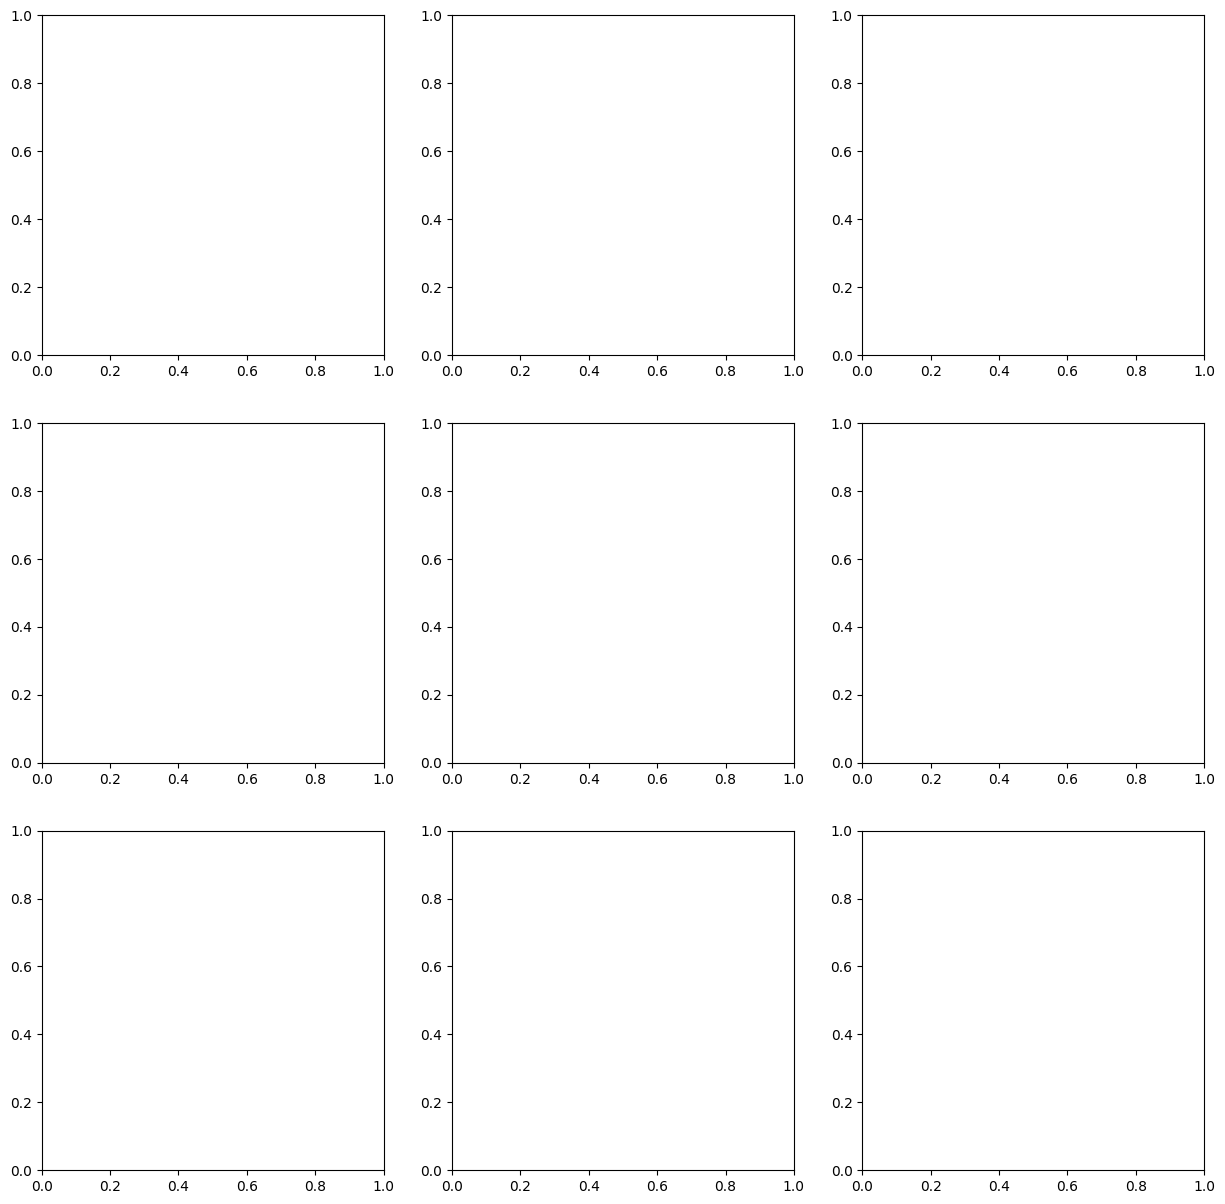

In [ ]:
# Set up matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger figure size for better visibility
plt.figure(figsize=(10, 8))

# Define a list of pairs of columns for which to plot correlation heatmaps
correlation_pairs = [
    ('carrier_delay', 'arr_delay'),
    ('weather_delay', 'arr_delay'),
    ('nas_delay', 'arr_delay'),
    ('security_delay', 'arr_delay'),
    ('late_aircraft_delay', 'arr_delay'),
    ('month', 'arr_delay'),
    ('arr_diverted', 'late_aircraft_delay'),
    ('arr_cancelled', 'late_aircraft_delay'),
    ('arr_flights', 'arr_del15')
]

# Plot each correlation as a separate subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, (x, y) in enumerate(correlation_pairs):
    # Compute the correlation matrix for the pair
    corr_matrix = data[[x, y]].corr()
    ax = axes[i // 3, i % 3]
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False, ax=ax)
    ax.set_title(f'Correlation between {x} and {y}')

plt.tight_layout()
plt.show()



In [ ]:
# Calculate the number of flights delayed by 15 minutes or more using the 'arr_del15' column
number_of_delays = data['arr_del15'].sum()
number_of_delays


In [ ]:
# Calculate the number of flights delayed by 15 minutes or more using the 'arr_del15' column
number_of_delays = data['arr_del15'].sum()
print(f"Number of flights delayed by 15 minutes or more: {number_of_delays}")


In [ ]:
# Update the dataset with the number of on-time flights for each entry
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']

# Optionally, check the entire dataset to confirm the update
print(data[['arr_flights', 'arr_del15', 'on_time_flights']])

# You can also describe the new column to see statistics
print(data['on_time_flights'].describe())




In [ ]:
# Save the updated dataset to a new CSV file
data.to_csv('updated_flight_data.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt

# Ensure 'on_time_flights' is calculated correctly
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']

# Creating a 'year_month' identifier for easier grouping
data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# Sum on-time flights by 'year_month'
monthly_yearly_on_time = data.groupby('year_month')['on_time_flights'].sum().reset_index()

# Extract year and month for plotting
monthly_yearly_on_time['year'] = monthly_yearly_on_time['year_month'].apply(lambda x: x.split('-')[0])
monthly_yearly_on_time['month'] = monthly_yearly_on_time['year_month'].apply(lambda x: int(x.split('-')[1]))

# Sorting by year and month to make sure data is in order
monthly_yearly_on_time.sort_values(by=['year', 'month'], inplace=True)

# Plotting setup
plt.figure(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend this list if you have more than 7 years
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'h', 'H', 'D', 'd']  # Different markers for each year

# Group by year and then plot each group
for (key, grp), color, marker in zip(monthly_yearly_on_time.groupby('year'), colors, markers):
    plt.plot(grp['month'], grp['on_time_flights'], label=f'Year {key}', marker=marker, color=color)

plt.title('Monthly On-Time Flights Over Different Years')
plt.xlabel('Month')
plt.ylabel('Number of On-Time Flights')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(0, int(max(monthly_yearly_on_time['on_time_flights']) + 20000), 20000))  # Increase y-axis values by 20000 units
plt.legend(title='Year')
plt.grid(True)
plt.show()




NameError: name 'data' is not defined

NameError: name 'monthly_yearly_on_time' is not defined

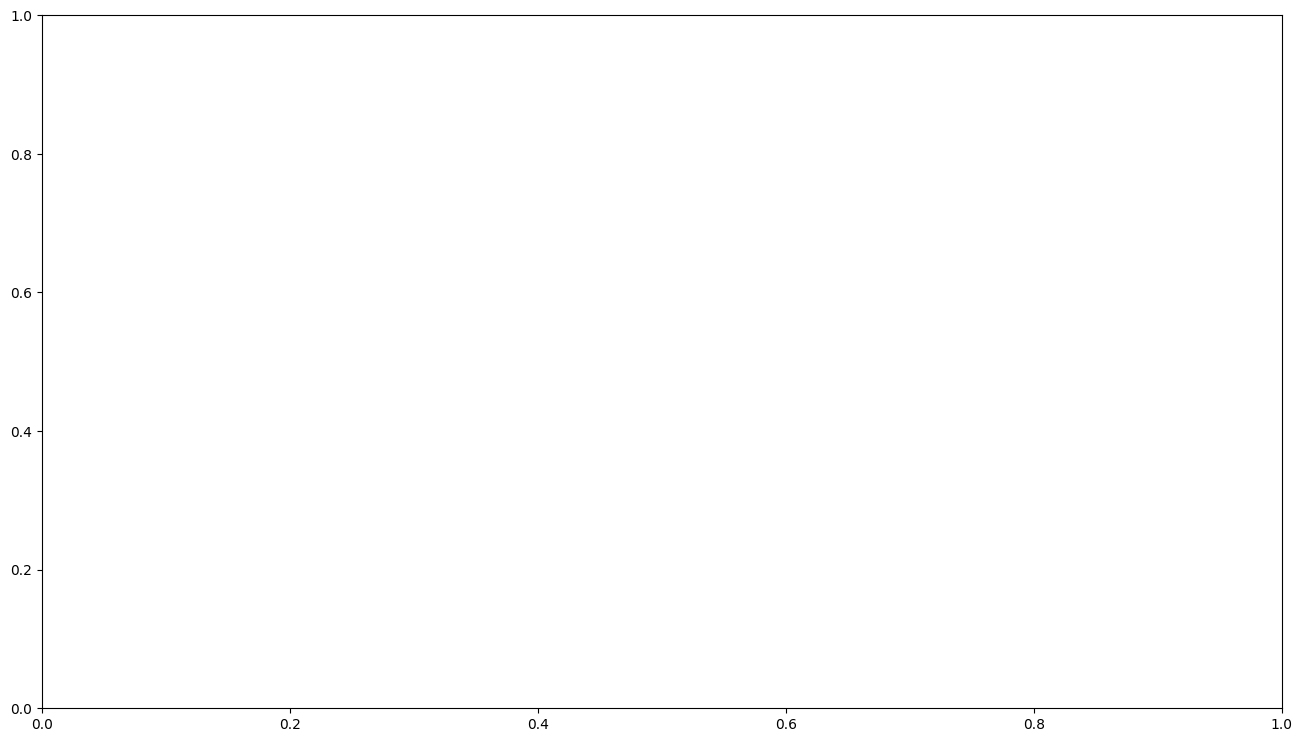

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unique months for labeling the x-axis correctly
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bar_width = 0.15  # Width of the bars

fig, ax = plt.subplots(figsize=(16, 9))
index = np.arange(len(months_labels))  # Index for the months

# Data handling and plotting for each year
for i, year in enumerate(['2020', '2021', '2022', '2023', '2024']):
    # Filter data for each year and fill missing months with zeros for consistent plotting
    yearly_data = monthly_yearly_on_time[monthly_yearly_on_time['year'] == year]
    monthly_data = np.zeros(12)  # Assume 12 months, fill with zeros
    for month in yearly_data['month'].astype(int):
        monthly_data[month-1] = yearly_data[yearly_data['month'].astype(int) == month]['on_time_flights'].values[0]

    ax.bar(index + bar_width * i, monthly_data, bar_width, label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Number of On-Time Flights')
ax.set_title('Monthly On-Time Flights Over Different Years (2020-2024)')
ax.set_xticks(index + bar_width * 2)  # Adjust tick positions for better alignment
ax.set_xticklabels(months_labels)
ax.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Ensure 'on_time_flights' is calculated correctly
data['on_time_flights'] = data['arr_flights'] - data['arr_del15']

# Calculate the frequency of on-time flights for each airport
on_time_frequencies = data.groupby('airport')['on_time_flights'].sum().sort_values(ascending=False)

# Total number of groups
num_airports = len(on_time_frequencies)
groups = (num_airports + 14) // 15  # This ensures we capture all airports even if the total number isn't a multiple of 15

# Plotting each group
for i in range(groups):
    start_idx = i * 15
    end_idx = start_idx + 15
    subset = on_time_frequencies[start_idx:end_idx]

    plt.figure(figsize=(10, 5))
    subset.plot(kind='bar', color='teal')
    plt.title(f'Airports Group {i+1} - Airports {start_idx+1} to {min(end_idx, num_airports)}')
    plt.xlabel('Airport')
    plt.ylabel('Number of On-Time Flights')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Calculate the total number of flights
total_flights = data['arr_flights'].sum()

# Calculate the total number of delayed flights
total_delayed_flights = data['arr_del15'].sum()

# Calculate the total number of on-time flights
total_on_time_flights = total_flights - total_delayed_flights

# Print the results
print(f"Total number of flights: {total_flights}")
print(f"Total number of delayed flights: {total_delayed_flights}")
print(f"Total number of on-time flights: {total_on_time_flights}")



In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of flights
total_flights = data['arr_flights'].sum()

# Calculate the total number of delayed flights
total_delayed_flights = data['arr_del15'].sum()

# Calculate the total number of on-time flights
total_on_time_flights = total_flights - total_delayed_flights

# Ensure the sizes are all non-negative
sizes = [total_on_time_flights, total_delayed_flights]

# Labels for the pie chart
labels = ['On Time', 'Delayed']

# Colors for the pie chart
colors = ['skyblue', 'orange']

# Explode the first slice for emphasis
explode = [0.1, 0]  # Explode the 'On Time' slice

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of On-Time Flights vs. Delayed Flights')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of flights
total_flights = data['arr_flights'].sum()

# Calculate the total number of delayed flights
total_delayed_flights = data['arr_del15'].sum()

# Calculate the total number of on-time flights
total_on_time_flights = total_flights - total_delayed_flights

# Calculate each type of delay
air_carrier_delay = (data['carrier_delay'] > 0).sum()
weather_delay = (data['weather_delay'] > 0).sum()
nas_delay = (data['nas_delay'] > 0).sum()
security_delay = (data['security_delay'] > 0).sum()
aircraft_arriving_late = (data['late_aircraft_delay'] > 0).sum()

# Ensure the sizes are all non-negative
sizes_overall = [total_on_time_flights, total_delayed_flights]
sizes_delays = [air_carrier_delay, weather_delay, nas_delay, security_delay, aircraft_arriving_late]

# Labels for the pie chart
labels_overall = ['On Time', 'Delayed']
labels_delays = ['Air Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Aircraft Arriving Late']

# Colors for the pie chart
colors_overall = ['skyblue', 'orange']
colors_delays = ['orange', 'green', 'red', 'purple', 'pink']

# Explode the slices for emphasis
explode_overall = [0.1, 0]
explode_delays = [0.1] * len(labels_delays)

# Plotting the pie charts
plt.figure(figsize=(14, 7))

# Pie chart for on-time vs delayed
plt.subplot(1, 2, 1)
plt.pie(sizes_overall, explode=explode_overall, labels=labels_overall, colors=colors_overall, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of On-Time Flights vs. Delayed Flights')

# Pie chart for types of delays
plt.subplot(1, 2, 2)
plt.pie(sizes_delays, explode=explode_delays, labels=labels_delays, colors=colors_delays, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Breakdown of Delayed Flights by Type')

plt.show()



NEURAL NETWORK IMPLEMENTATION STARTS FROM HERE. any aircraft which has a total delayed time more than 15 minutes will be considered to be delayed or else on time

IMPEMENTING AN ANN ON 0.1 test DATASET

> Add blockquote




using dropuot regularization technique


In [ ]:
!pip install keras-tuner


In [ ]:
!pip install keras-tuner imbalanced-learn


IMPEMENTING AN ANN ON 80 PERCENT TRAIN DATASET




IMPEMENTING AN ANN ON 20 PERCENT TEST DATASET





ANN AT 0.3 TEST DATASET

ANN AT 0.4 PERCENT TEST DATASET

APPLYING BIDIRECTIONAL LSTM at 0.1 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
404/404 [==============================] - 10s 14ms/step - loss: 0.6619 - accuracy: 0.6623 - val_loss: 0.5882 - val_accuracy: 0.7244
Epoch 2/120
 13/404 [..............................] - ETA: 3s - loss: 0.5864 - accuracy: 0.7335

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


404/404 [==============================] - 5s 11ms/step - loss: 0.5116 - accuracy: 0.7700 - val_loss: 0.4550 - val_accuracy: 0.8027
Epoch 3/120
404/404 [==============================] - 5s 11ms/step - loss: 0.4419 - accuracy: 0.8112 - val_loss: 0.4133 - val_accuracy: 0.8296
Epoch 4/120
404/404 [==============================] - 5s 12ms/step - loss: 0.4106 - accuracy: 0.8309 - val_loss: 0.3822 - val_accuracy: 0.8478
Epoch 5/120
404/404 [==============================] - 5s 11ms/step - loss: 0.3862 - accuracy: 0.8443 - val_loss: 0.3557 - val_accuracy: 0.8639
Epoch 6/120
404/404 [==============================] - 5s 12ms/step - loss: 0.3621 - accuracy: 0.8555 - val_loss: 0.3310 - val_accuracy: 0.8769
Epoch 7/120
404/404 [==============================] - 5s 12ms/step - loss: 0.3449 - accuracy: 0.8633 - val_loss: 0.3105 - val_accuracy: 0.8832
Epoch 8/120
404/404 [==============================] - 5s 12ms/step - loss: 0.3277 - accuracy: 0.8702 - val_loss: 0.2933 - val_accuracy: 0.8862
Epoc

Epoch 1/120
404/404 [==============================] - 10s 13ms/step - loss: 0.6599 - accuracy: 0.6473 - val_loss: 0.5855 - val_accuracy: 0.7157
Epoch 2/120
404/404 [==============================] - 5s 11ms/step - loss: 0.5116 - accuracy: 0.7685 - val_loss: 0.4574 - val_accuracy: 0.8027
Epoch 3/120
404/404 [==============================] - 5s 11ms/step - loss: 0.4376 - accuracy: 0.8121 - val_loss: 0.4120 - val_accuracy: 0.8314
Epoch 4/120
404/404 [==============================] - 5s 11ms/step - loss: 0.4024 - accuracy: 0.8339 - val_loss: 0.3779 - val_accuracy: 0.8531
Epoch 5/120
404/404 [==============================] - 5s 12ms/step - loss: 0.3747 - accuracy: 0.8502 - val_loss: 0.3485 - val_accuracy: 0.8668
Epoch 6/120
404/404 [==============================] - 4s 11ms/step - loss: 0.3534 - accuracy: 0.8601 - val_loss: 0.3228 - val_accuracy: 0.8783
Epoch 7/120
404/404 [==============================] - 5s 11ms/step - loss: 0.3325 - accuracy: 0.8697 - val_loss: 0.3010 - val_accuracy

Epoch 1/120
404/404 [==============================] - 10s 13ms/step - loss: 0.6611 - accuracy: 0.6647 - val_loss: 0.5850 - val_accuracy: 0.7272
Epoch 2/120
404/404 [==============================] - 5s 11ms/step - loss: 0.5108 - accuracy: 0.7690 - val_loss: 0.4477 - val_accuracy: 0.8119
Epoch 3/120
404/404 [==============================] - 4s 11ms/step - loss: 0.4385 - accuracy: 0.8113 - val_loss: 0.4022 - val_accuracy: 0.8425
Epoch 4/120
404/404 [==============================] - 5s 12ms/step - loss: 0.4036 - accuracy: 0.8342 - val_loss: 0.3684 - val_accuracy: 0.8514
Epoch 5/120
404/404 [==============================] - 4s 11ms/step - loss: 0.3767 - accuracy: 0.8489 - val_loss: 0.3387 - val_accuracy: 0.8698
Epoch 6/120
404/404 [==============================] - 4s 11ms/step - loss: 0.3538 - accuracy: 0.8594 - val_loss: 0.3131 - val_accuracy: 0.8849
Epoch 7/120
404/404 [==============================] - 5s 11ms/step - loss: 0.3335 - accuracy: 0.8684 - val_loss: 0.2914 - val_accuracy

Validation Accuracy: 0.9896
Mean Validation Accuracy: 0.9891


Epoch 1/120
605/605 [==============================] - 11s 11ms/step - loss: 0.6229 - accuracy: 0.6974 - val_loss: 0.5407 - val_accuracy: 0.6806
Epoch 2/120
605/605 [==============================] - 6s 10ms/step - loss: 0.4496 - accuracy: 0.8055 - val_loss: 0.4265 - val_accuracy: 0.7657
Epoch 3/120
605/605 [==============================] - 6s 10ms/step - loss: 0.3935 - accuracy: 0.8404 - val_loss: 0.3671 - val_accuracy: 0.8074
Epoch 4/120
605/605 [==============================] - 6s 10ms/step - loss: 0.3564 - accuracy: 0.8584 - val_loss: 0.3257 - val_accuracy: 0.8350
Epoch 5/120
605/605 [==============================] - 6s 10ms/step - loss: 0.3263 - accuracy: 0.8719 - val_loss: 0.3084 - val_accuracy: 0.8474
Epoch 6/120
605/605 [==============================] - 6s 10ms/step - loss: 0.3034 - accuracy: 0.8799 - val_loss: 0.2699 - val_accuracy: 0.8707
Epoch 7/120
605/605 [==============================] - 6s 10ms/step - loss: 0.2855 - accuracy: 0.8873 - val_loss: 0.2563 - val_accuracy

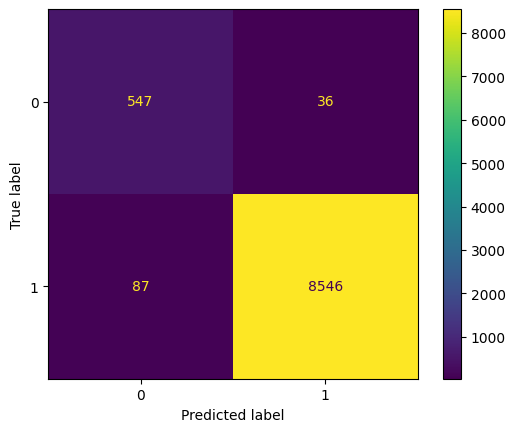

288/288 [==============================] - 1s 2ms/step
ROC AUC: 0.9869


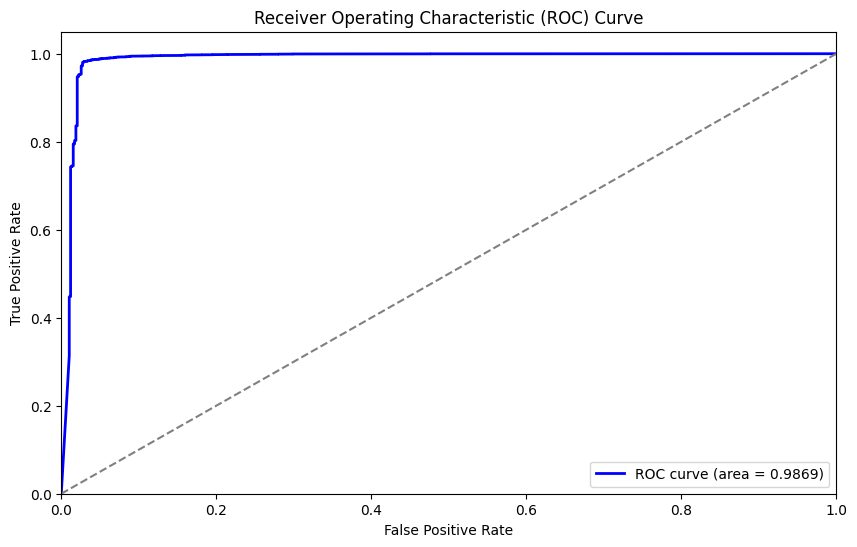

Mean Absolute Error (MAE): 0.0133
Mean Squared Error (MSE): 0.0133
Root Mean Squared Error (RMSE): 0.1155
Log Loss: 0.0483
Huber Loss: 0.0051
R-squared Error: 0.7748
Mean Absolute Percentage Error (MAPE): 17592186044416.0078


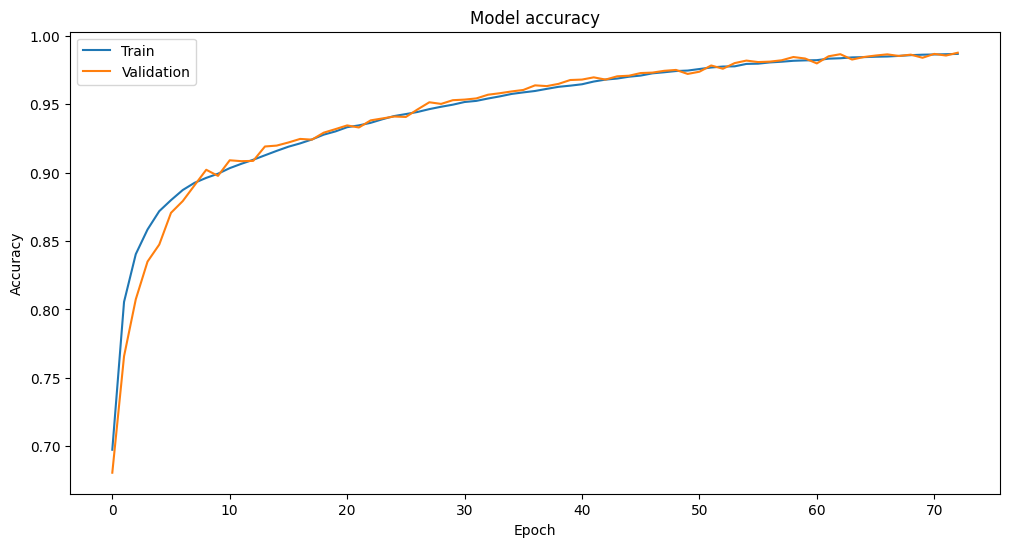

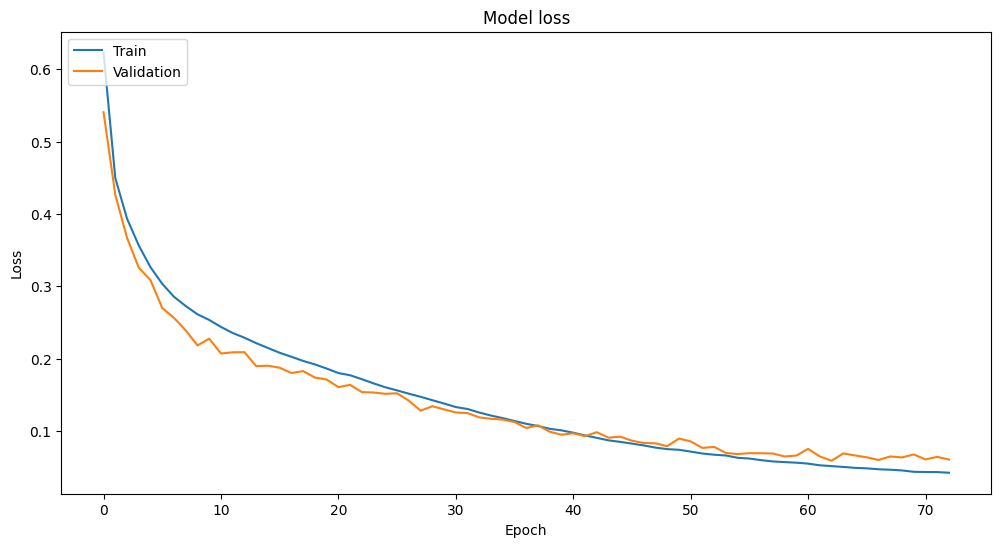

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the Bidirectional LSTM model
def create_model():
    model = Sequential([
        Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        Bidirectional(LSTM(64, activation='relu', return_sequences=False)),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

APPLYING BIDIRECTIONAL LSTM at 0.2 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
359/359 [==============================] - 10s 14ms/step - loss: 0.6678 - accuracy: 0.6804 - val_loss: 0.6093 - val_accuracy: 0.7312
Epoch 2/120
 11/359 [..............................] - ETA: 3s - loss: 0.6133 - accuracy: 0.7198

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


359/359 [==============================] - 4s 12ms/step - loss: 0.5254 - accuracy: 0.7641 - val_loss: 0.4608 - val_accuracy: 0.7978
Epoch 3/120
359/359 [==============================] - 4s 11ms/step - loss: 0.4405 - accuracy: 0.8094 - val_loss: 0.4142 - val_accuracy: 0.8305
Epoch 4/120
359/359 [==============================] - 4s 12ms/step - loss: 0.4056 - accuracy: 0.8315 - val_loss: 0.3822 - val_accuracy: 0.8494
Epoch 5/120
359/359 [==============================] - 4s 11ms/step - loss: 0.3781 - accuracy: 0.8479 - val_loss: 0.3543 - val_accuracy: 0.8621
Epoch 6/120
359/359 [==============================] - 4s 11ms/step - loss: 0.3565 - accuracy: 0.8585 - val_loss: 0.3288 - val_accuracy: 0.8773
Epoch 7/120
359/359 [==============================] - 4s 11ms/step - loss: 0.3369 - accuracy: 0.8675 - val_loss: 0.3072 - val_accuracy: 0.8844
Epoch 8/120
359/359 [==============================] - 4s 11ms/step - loss: 0.3189 - accuracy: 0.8744 - val_loss: 0.2878 - val_accuracy: 0.8970
Epoc

Epoch 1/120
359/359 [==============================] - 9s 13ms/step - loss: 0.6673 - accuracy: 0.6665 - val_loss: 0.6071 - val_accuracy: 0.7104
Epoch 2/120
359/359 [==============================] - 4s 12ms/step - loss: 0.5238 - accuracy: 0.7631 - val_loss: 0.4577 - val_accuracy: 0.7995
Epoch 3/120
359/359 [==============================] - 4s 11ms/step - loss: 0.4409 - accuracy: 0.8101 - val_loss: 0.4088 - val_accuracy: 0.8317
Epoch 4/120
359/359 [==============================] - 4s 11ms/step - loss: 0.4078 - accuracy: 0.8321 - val_loss: 0.3773 - val_accuracy: 0.8498
Epoch 5/120
359/359 [==============================] - 4s 13ms/step - loss: 0.3821 - accuracy: 0.8460 - val_loss: 0.3498 - val_accuracy: 0.8672
Epoch 6/120
359/359 [==============================] - 4s 11ms/step - loss: 0.3590 - accuracy: 0.8572 - val_loss: 0.3247 - val_accuracy: 0.8754
Epoch 7/120
359/359 [==============================] - 4s 11ms/step - loss: 0.3388 - accuracy: 0.8673 - val_loss: 0.3027 - val_accuracy:

Epoch 1/120
359/359 [==============================] - 13s 15ms/step - loss: 0.6682 - accuracy: 0.6624 - val_loss: 0.6095 - val_accuracy: 0.7145
Epoch 2/120
359/359 [==============================] - 4s 12ms/step - loss: 0.5271 - accuracy: 0.7617 - val_loss: 0.4563 - val_accuracy: 0.8076
Epoch 3/120
359/359 [==============================] - 4s 12ms/step - loss: 0.4392 - accuracy: 0.8113 - val_loss: 0.4062 - val_accuracy: 0.8325
Epoch 4/120
359/359 [==============================] - 5s 13ms/step - loss: 0.4055 - accuracy: 0.8320 - val_loss: 0.3739 - val_accuracy: 0.8543
Epoch 5/120
359/359 [==============================] - 4s 12ms/step - loss: 0.3773 - accuracy: 0.8483 - val_loss: 0.3457 - val_accuracy: 0.8677
Epoch 6/120
359/359 [==============================] - 4s 12ms/step - loss: 0.3546 - accuracy: 0.8591 - val_loss: 0.3211 - val_accuracy: 0.8792
Epoch 7/120
359/359 [==============================] - 4s 12ms/step - loss: 0.3344 - accuracy: 0.8689 - val_loss: 0.2995 - val_accuracy

Validation Accuracy: 0.9866
Mean Validation Accuracy: 0.9863
Epoch 1/120
538/538 [==============================] - 11s 12ms/step - loss: 0.6292 - accuracy: 0.7061 - val_loss: 0.5626 - val_accuracy: 0.6537
Epoch 2/120
538/538 [==============================] - 6s 11ms/step - loss: 0.4555 - accuracy: 0.8020 - val_loss: 0.4366 - val_accuracy: 0.7647
Epoch 3/120
538/538 [==============================] - 5s 10ms/step - loss: 0.4027 - accuracy: 0.8350 - val_loss: 0.3757 - val_accuracy: 0.8065
Epoch 4/120
538/538 [==============================] - 6s 11ms/step - loss: 0.3658 - accuracy: 0.8540 - val_loss: 0.3415 - val_accuracy: 0.8316
Epoch 5/120
538/538 [==============================] - 6s 10ms/step - loss: 0.3360 - accuracy: 0.8682 - val_loss: 0.3221 - val_accuracy: 0.8430
Epoch 6/120
538/538 [==============================] - 6s 11ms/step - loss: 0.3121 - accuracy: 0.8773 - val_loss: 0.2914 - val_accuracy: 0.8627
Epoch 7/120
538/538 [==============================] - 6s 10ms/step - loss

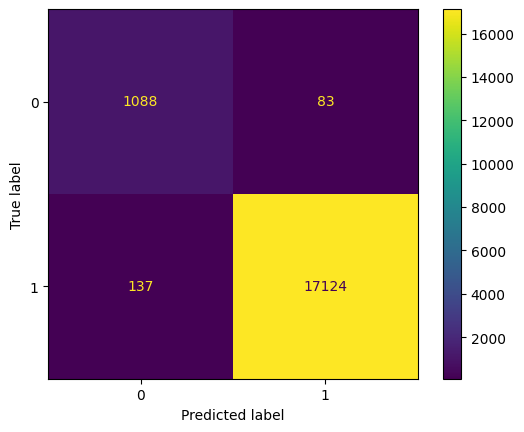

576/576 [==============================] - 1s 2ms/step
ROC AUC: 0.9838


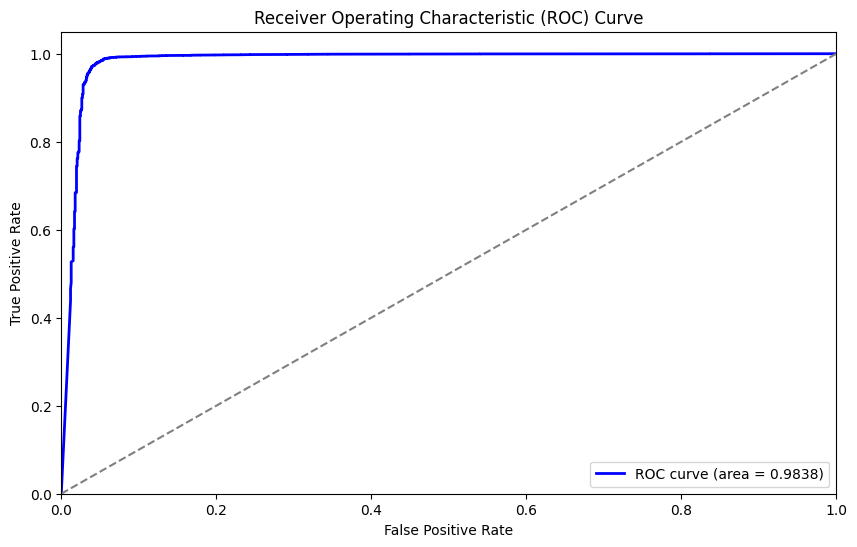

Mean Absolute Error (MAE): 0.0119
Mean Squared Error (MSE): 0.0119
Root Mean Squared Error (RMSE): 0.1093
Log Loss: 0.0523
Huber Loss: 0.0051
R-squared Error: 0.7994
Mean Absolute Percentage Error (MAPE): 20279881134535.1172


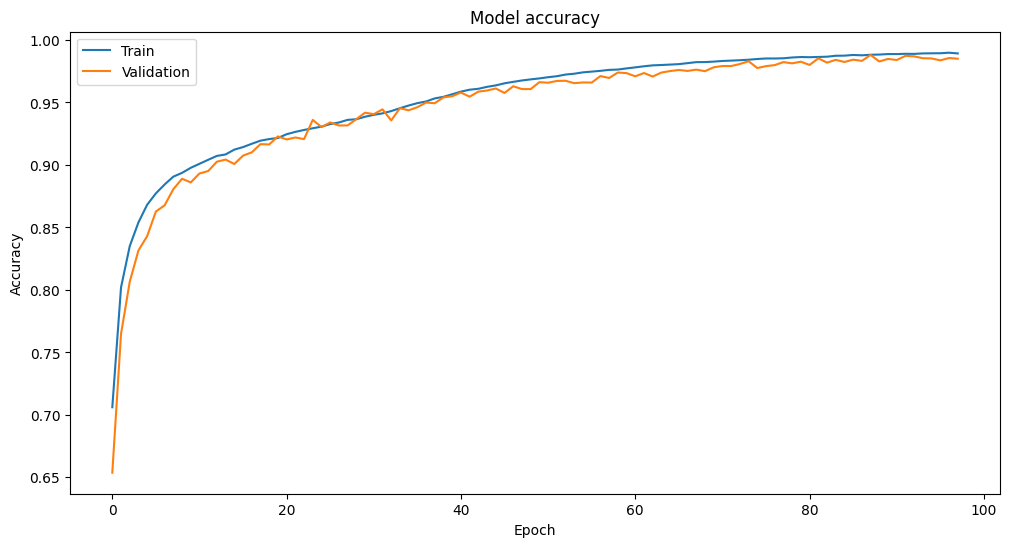

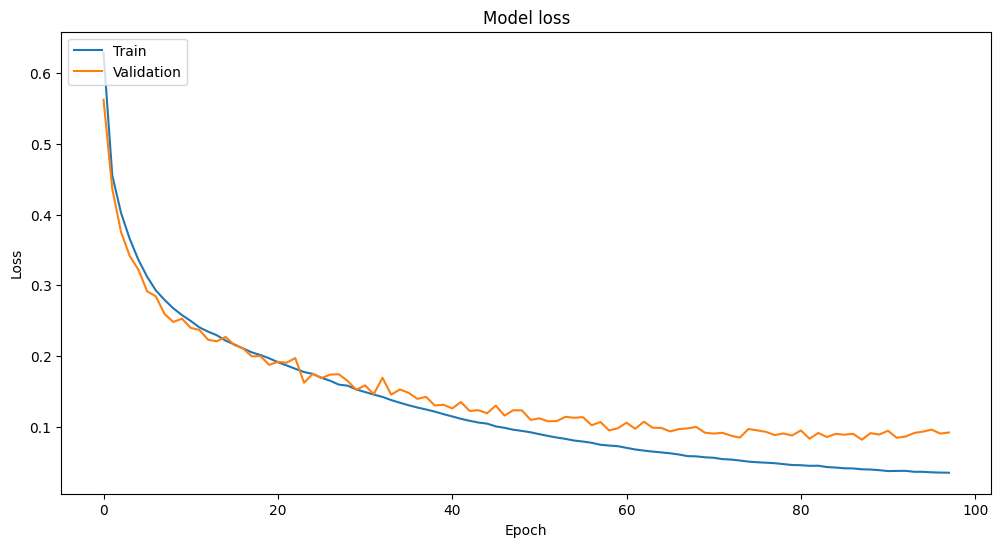

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the Bidirectional LSTM model
def create_model():
    model = Sequential([
        Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        Bidirectional(LSTM(64, activation='relu', return_sequences=False)),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

APPLYING BIDIRECTIONAL LSTM at 0.3 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
314/314 [==============================] - 9s 13ms/step - loss: 0.6778 - accuracy: 0.6630 - val_loss: 0.6384 - val_accuracy: 0.6975
Epoch 2/120
 12/314 [>.............................] - ETA: 3s - loss: 0.6403 - accuracy: 0.6943

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


314/314 [==============================] - 4s 11ms/step - loss: 0.5613 - accuracy: 0.7440 - val_loss: 0.4847 - val_accuracy: 0.7802
Epoch 3/120
314/314 [==============================] - 3s 11ms/step - loss: 0.4585 - accuracy: 0.7979 - val_loss: 0.4252 - val_accuracy: 0.8207
Epoch 4/120
314/314 [==============================] - 3s 11ms/step - loss: 0.4192 - accuracy: 0.8236 - val_loss: 0.3922 - val_accuracy: 0.8433
Epoch 5/120
314/314 [==============================] - 4s 12ms/step - loss: 0.3922 - accuracy: 0.8407 - val_loss: 0.3649 - val_accuracy: 0.8601
Epoch 6/120
314/314 [==============================] - 3s 11ms/step - loss: 0.3687 - accuracy: 0.8533 - val_loss: 0.3402 - val_accuracy: 0.8713
Epoch 7/120
314/314 [==============================] - 3s 11ms/step - loss: 0.3482 - accuracy: 0.8620 - val_loss: 0.3181 - val_accuracy: 0.8829
Epoch 8/120
314/314 [==============================] - 3s 11ms/step - loss: 0.3314 - accuracy: 0.8704 - val_loss: 0.2993 - val_accuracy: 0.8883
Epoc

Epoch 1/120
314/314 [==============================] - 9s 14ms/step - loss: 0.6735 - accuracy: 0.6718 - val_loss: 0.6284 - val_accuracy: 0.7169
Epoch 2/120
314/314 [==============================] - 4s 11ms/step - loss: 0.5492 - accuracy: 0.7545 - val_loss: 0.4793 - val_accuracy: 0.7893
Epoch 3/120
314/314 [==============================] - 4s 12ms/step - loss: 0.4565 - accuracy: 0.7992 - val_loss: 0.4271 - val_accuracy: 0.8214
Epoch 4/120
314/314 [==============================] - 4s 11ms/step - loss: 0.4218 - accuracy: 0.8232 - val_loss: 0.3970 - val_accuracy: 0.8427
Epoch 5/120
314/314 [==============================] - 4s 12ms/step - loss: 0.3974 - accuracy: 0.8367 - val_loss: 0.3713 - val_accuracy: 0.8558
Epoch 6/120
314/314 [==============================] - 4s 11ms/step - loss: 0.3756 - accuracy: 0.8498 - val_loss: 0.3486 - val_accuracy: 0.8676
Epoch 7/120
314/314 [==============================] - 4s 11ms/step - loss: 0.3571 - accuracy: 0.8571 - val_loss: 0.3279 - val_accuracy:

Epoch 1/120
314/314 [==============================] - 9s 14ms/step - loss: 0.6728 - accuracy: 0.6682 - val_loss: 0.6283 - val_accuracy: 0.7118
Epoch 2/120
314/314 [==============================] - 4s 12ms/step - loss: 0.5518 - accuracy: 0.7477 - val_loss: 0.4790 - val_accuracy: 0.7902
Epoch 3/120
314/314 [==============================] - 4s 12ms/step - loss: 0.4561 - accuracy: 0.7991 - val_loss: 0.4254 - val_accuracy: 0.8272
Epoch 4/120
314/314 [==============================] - 4s 12ms/step - loss: 0.4201 - accuracy: 0.8245 - val_loss: 0.3944 - val_accuracy: 0.8466
Epoch 5/120
314/314 [==============================] - 4s 11ms/step - loss: 0.3941 - accuracy: 0.8382 - val_loss: 0.3691 - val_accuracy: 0.8607
Epoch 6/120
314/314 [==============================] - 4s 11ms/step - loss: 0.3724 - accuracy: 0.8505 - val_loss: 0.3460 - val_accuracy: 0.8672
Epoch 7/120
314/314 [==============================] - 4s 12ms/step - loss: 0.3533 - accuracy: 0.8596 - val_loss: 0.3246 - val_accuracy:

Validation Accuracy: 0.9851
Mean Validation Accuracy: 0.9840
Epoch 1/120
471/471 [==============================] - 10s 12ms/step - loss: 0.6495 - accuracy: 0.6803 - val_loss: 0.5955 - val_accuracy: 0.6130
Epoch 2/120
471/471 [==============================] - 5s 11ms/step - loss: 0.4804 - accuracy: 0.7842 - val_loss: 0.4639 - val_accuracy: 0.7485
Epoch 3/120
471/471 [==============================] - 5s 11ms/step - loss: 0.4201 - accuracy: 0.8223 - val_loss: 0.4104 - val_accuracy: 0.7826
Epoch 4/120
471/471 [==============================] - 5s 10ms/step - loss: 0.3867 - accuracy: 0.8429 - val_loss: 0.3632 - val_accuracy: 0.8141
Epoch 5/120
471/471 [==============================] - 5s 11ms/step - loss: 0.3581 - accuracy: 0.8567 - val_loss: 0.3267 - val_accuracy: 0.8381
Epoch 6/120
471/471 [==============================] - 5s 10ms/step - loss: 0.3338 - accuracy: 0.8676 - val_loss: 0.3080 - val_accuracy: 0.8511
Epoch 7/120
471/471 [==============================] - 5s 11ms/step - loss

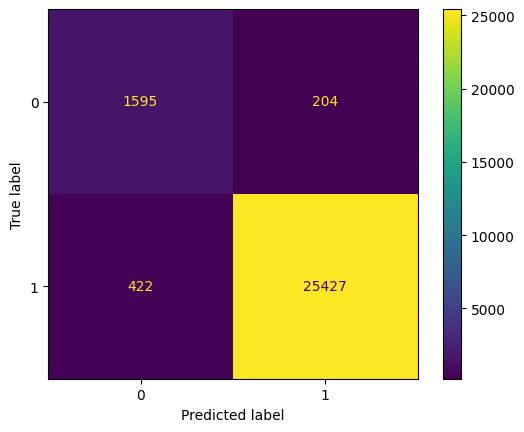

864/864 [==============================] - 2s 2ms/step
ROC AUC: 0.9824


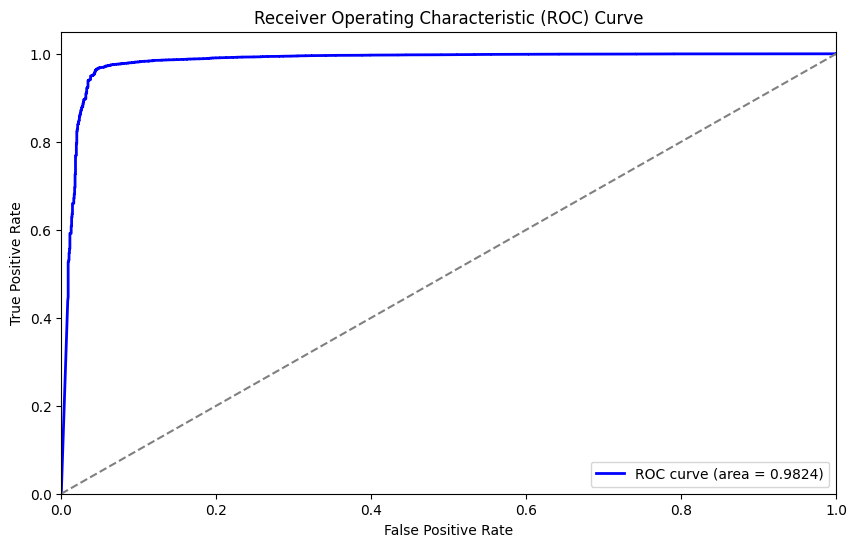

Mean Absolute Error (MAE): 0.0226
Mean Squared Error (MSE): 0.0226
Root Mean Squared Error (RMSE): 0.1505
Log Loss: 0.0714
Huber Loss: 0.0086
R-squared Error: 0.6278
Mean Absolute Percentage Error (MAPE): 33229684750563.5703


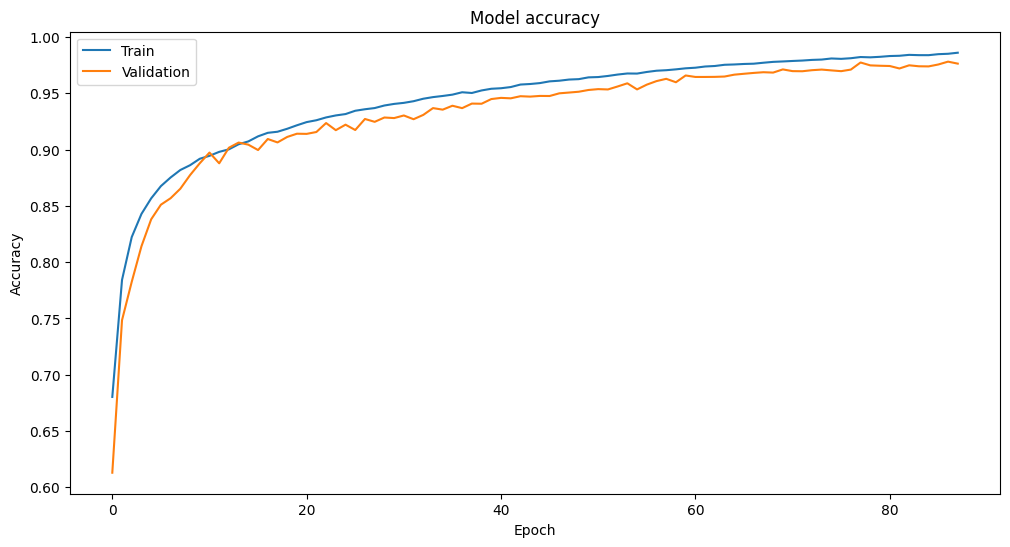

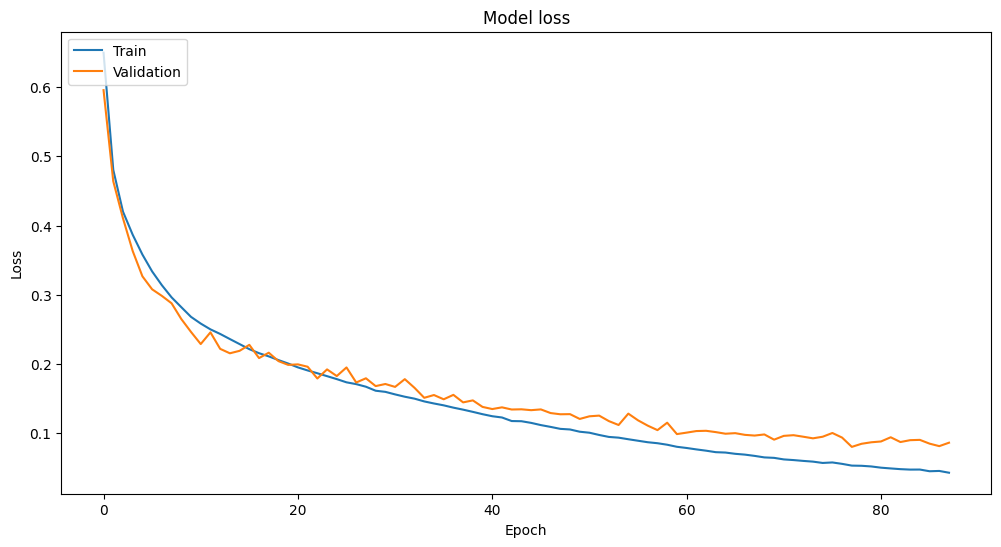

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the Bidirectional LSTM model
def create_model():
    model = Sequential([
        Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        Bidirectional(LSTM(64, activation='relu', return_sequences=False)),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

APPLYING BIDIRECTIONAL LSTM at 0.4 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
269/269 [==============================] - 9s 14ms/step - loss: 0.6788 - accuracy: 0.6695 - val_loss: 0.6478 - val_accuracy: 0.7345
Epoch 2/120
 13/269 [>.............................] - ETA: 2s - loss: 0.6488 - accuracy: 0.7233

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


269/269 [==============================] - 3s 12ms/step - loss: 0.5837 - accuracy: 0.7426 - val_loss: 0.5090 - val_accuracy: 0.7684
Epoch 3/120
269/269 [==============================] - 3s 12ms/step - loss: 0.4778 - accuracy: 0.7859 - val_loss: 0.4414 - val_accuracy: 0.8126
Epoch 4/120
269/269 [==============================] - 3s 11ms/step - loss: 0.4370 - accuracy: 0.8125 - val_loss: 0.4094 - val_accuracy: 0.8313
Epoch 5/120
269/269 [==============================] - 3s 12ms/step - loss: 0.4117 - accuracy: 0.8287 - val_loss: 0.3841 - val_accuracy: 0.8481
Epoch 6/120
269/269 [==============================] - 3s 12ms/step - loss: 0.3914 - accuracy: 0.8414 - val_loss: 0.3617 - val_accuracy: 0.8588
Epoch 7/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3722 - accuracy: 0.8516 - val_loss: 0.3423 - val_accuracy: 0.8645
Epoch 8/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3538 - accuracy: 0.8588 - val_loss: 0.3225 - val_accuracy: 0.8802
Epoc

Epoch 1/120
269/269 [==============================] - 9s 15ms/step - loss: 0.6787 - accuracy: 0.6643 - val_loss: 0.6469 - val_accuracy: 0.7029
Epoch 2/120
269/269 [==============================] - 3s 11ms/step - loss: 0.5814 - accuracy: 0.7405 - val_loss: 0.5121 - val_accuracy: 0.7694
Epoch 3/120
269/269 [==============================] - 3s 12ms/step - loss: 0.4766 - accuracy: 0.7871 - val_loss: 0.4459 - val_accuracy: 0.8069
Epoch 4/120
269/269 [==============================] - 3s 12ms/step - loss: 0.4352 - accuracy: 0.8157 - val_loss: 0.4121 - val_accuracy: 0.8276
Epoch 5/120
269/269 [==============================] - 3s 11ms/step - loss: 0.4064 - accuracy: 0.8334 - val_loss: 0.3848 - val_accuracy: 0.8459
Epoch 6/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3855 - accuracy: 0.8436 - val_loss: 0.3613 - val_accuracy: 0.8578
Epoch 7/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3649 - accuracy: 0.8549 - val_loss: 0.3389 - val_accuracy:

Epoch 1/120
269/269 [==============================] - 9s 14ms/step - loss: 0.6789 - accuracy: 0.6409 - val_loss: 0.6451 - val_accuracy: 0.6766
Epoch 2/120
269/269 [==============================] - 3s 11ms/step - loss: 0.5809 - accuracy: 0.7285 - val_loss: 0.5086 - val_accuracy: 0.7724
Epoch 3/120
269/269 [==============================] - 3s 11ms/step - loss: 0.4743 - accuracy: 0.7886 - val_loss: 0.4380 - val_accuracy: 0.8163
Epoch 4/120
269/269 [==============================] - 3s 12ms/step - loss: 0.4269 - accuracy: 0.8180 - val_loss: 0.4024 - val_accuracy: 0.8382
Epoch 5/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3983 - accuracy: 0.8356 - val_loss: 0.3753 - val_accuracy: 0.8529
Epoch 6/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3749 - accuracy: 0.8487 - val_loss: 0.3518 - val_accuracy: 0.8629
Epoch 7/120
269/269 [==============================] - 3s 11ms/step - loss: 0.3554 - accuracy: 0.8577 - val_loss: 0.3295 - val_accuracy:

Validation Accuracy: 0.9796
Mean Validation Accuracy: 0.9789
Epoch 1/120
403/403 [==============================] - 10s 12ms/step - loss: 0.6591 - accuracy: 0.6914 - val_loss: 0.6077 - val_accuracy: 0.5851
Epoch 2/120
403/403 [==============================] - 4s 11ms/step - loss: 0.4984 - accuracy: 0.7780 - val_loss: 0.4637 - val_accuracy: 0.7506
Epoch 3/120
403/403 [==============================] - 5s 11ms/step - loss: 0.4285 - accuracy: 0.8187 - val_loss: 0.4044 - val_accuracy: 0.7877
Epoch 4/120
403/403 [==============================] - 4s 11ms/step - loss: 0.3941 - accuracy: 0.8391 - val_loss: 0.3910 - val_accuracy: 0.7958
Epoch 5/120
403/403 [==============================] - 4s 11ms/step - loss: 0.3645 - accuracy: 0.8540 - val_loss: 0.3574 - val_accuracy: 0.8165
Epoch 6/120
403/403 [==============================] - 5s 11ms/step - loss: 0.3395 - accuracy: 0.8670 - val_loss: 0.3088 - val_accuracy: 0.8493
Epoch 7/120
403/403 [==============================] - 4s 11ms/step - loss

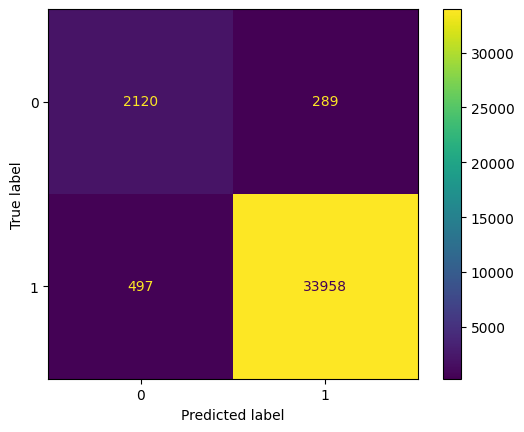

1152/1152 [==============================] - 2s 2ms/step
ROC AUC: 0.9798


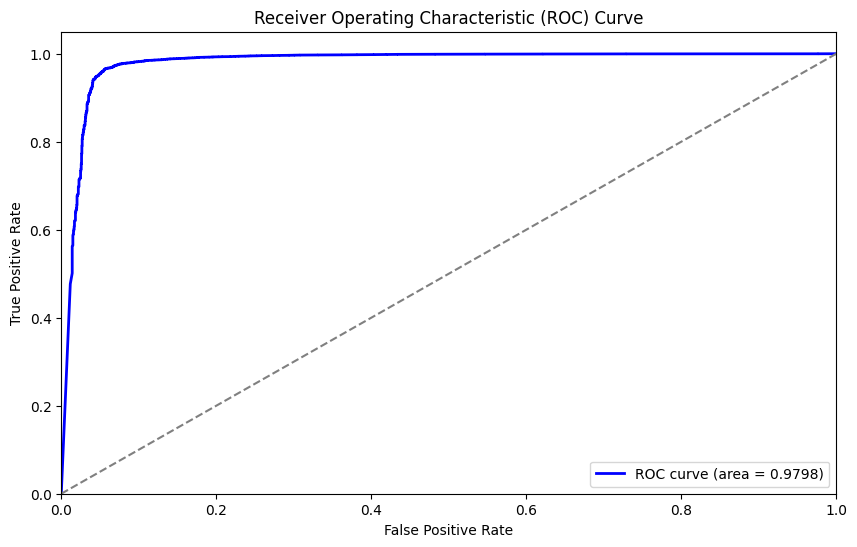

Mean Absolute Error (MAE): 0.0213
Mean Squared Error (MSE): 0.0213
Root Mean Squared Error (RMSE): 0.1460
Log Loss: 0.0738
Huber Loss: 0.0081
R-squared Error: 0.6509
Mean Absolute Percentage Error (MAPE): 35306540047473.7891


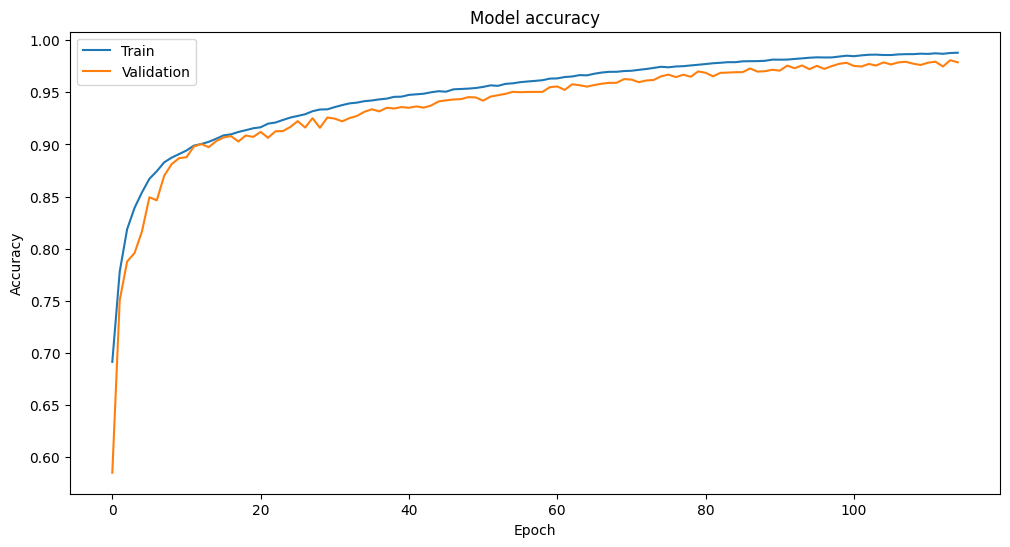

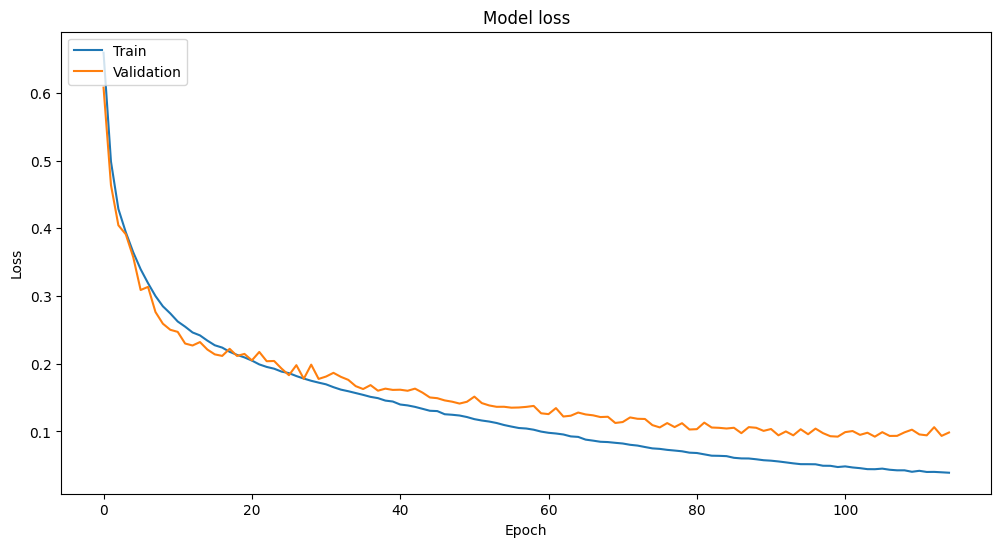

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the Bidirectional LSTM model
def create_model():
    model = Sequential([
        Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        Bidirectional(LSTM(64, activation='relu', return_sequences=False)),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

APPLYING GRU at 0.1 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
404/404 [==============================] - 7s 11ms/step - loss: 0.6609 - accuracy: 0.6415 - val_loss: 0.5945 - val_accuracy: 0.7235
Epoch 2/120
 13/404 [..............................] - ETA: 3s - loss: 0.5995 - accuracy: 0.7154

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


404/404 [==============================] - 4s 10ms/step - loss: 0.5344 - accuracy: 0.7522 - val_loss: 0.4769 - val_accuracy: 0.7939
Epoch 3/120
404/404 [==============================] - 4s 10ms/step - loss: 0.4707 - accuracy: 0.7915 - val_loss: 0.4385 - val_accuracy: 0.8168
Epoch 4/120
404/404 [==============================] - 4s 10ms/step - loss: 0.4445 - accuracy: 0.8114 - val_loss: 0.4142 - val_accuracy: 0.8348
Epoch 5/120
404/404 [==============================] - 4s 10ms/step - loss: 0.4237 - accuracy: 0.8252 - val_loss: 0.3933 - val_accuracy: 0.8414
Epoch 6/120
404/404 [==============================] - 4s 10ms/step - loss: 0.4046 - accuracy: 0.8362 - val_loss: 0.3737 - val_accuracy: 0.8506
Epoch 7/120
404/404 [==============================] - 4s 10ms/step - loss: 0.3884 - accuracy: 0.8457 - val_loss: 0.3550 - val_accuracy: 0.8649
Epoch 8/120
404/404 [==============================] - 4s 10ms/step - loss: 0.3731 - accuracy: 0.8537 - val_loss: 0.3375 - val_accuracy: 0.8701
Epoc

Epoch 1/120
404/404 [==============================] - 7s 10ms/step - loss: 0.6589 - accuracy: 0.6419 - val_loss: 0.5888 - val_accuracy: 0.7436
Epoch 2/120
404/404 [==============================] - 4s 9ms/step - loss: 0.5270 - accuracy: 0.7585 - val_loss: 0.4746 - val_accuracy: 0.7964
Epoch 3/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4666 - accuracy: 0.7958 - val_loss: 0.4387 - val_accuracy: 0.8241
Epoch 4/120
404/404 [==============================] - 3s 9ms/step - loss: 0.4395 - accuracy: 0.8147 - val_loss: 0.4161 - val_accuracy: 0.8345
Epoch 5/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4205 - accuracy: 0.8274 - val_loss: 0.3970 - val_accuracy: 0.8479
Epoch 6/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4055 - accuracy: 0.8348 - val_loss: 0.3807 - val_accuracy: 0.8577
Epoch 7/120
404/404 [==============================] - 3s 9ms/step - loss: 0.3925 - accuracy: 0.8426 - val_loss: 0.3654 - val_accuracy: 0.861

Epoch 1/120
404/404 [==============================] - 7s 11ms/step - loss: 0.6646 - accuracy: 0.6501 - val_loss: 0.6014 - val_accuracy: 0.7290
Epoch 2/120
404/404 [==============================] - 4s 9ms/step - loss: 0.5419 - accuracy: 0.7469 - val_loss: 0.4791 - val_accuracy: 0.7931
Epoch 3/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4742 - accuracy: 0.7902 - val_loss: 0.4368 - val_accuracy: 0.8203
Epoch 4/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4460 - accuracy: 0.8094 - val_loss: 0.4118 - val_accuracy: 0.8391
Epoch 5/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4256 - accuracy: 0.8239 - val_loss: 0.3909 - val_accuracy: 0.8518
Epoch 6/120
404/404 [==============================] - 4s 9ms/step - loss: 0.4083 - accuracy: 0.8343 - val_loss: 0.3713 - val_accuracy: 0.8624
Epoch 7/120
404/404 [==============================] - 4s 9ms/step - loss: 0.3914 - accuracy: 0.8438 - val_loss: 0.3539 - val_accuracy: 0.873

Validation Accuracy: 0.9897
Mean Validation Accuracy: 0.9889
Epoch 1/120
605/605 [==============================] - 8s 9ms/step - loss: 0.6237 - accuracy: 0.6833 - val_loss: 0.5509 - val_accuracy: 0.6719
Epoch 2/120
605/605 [==============================] - 5s 8ms/step - loss: 0.4767 - accuracy: 0.7891 - val_loss: 0.4437 - val_accuracy: 0.7541
Epoch 3/120
605/605 [==============================] - 5s 8ms/step - loss: 0.4310 - accuracy: 0.8209 - val_loss: 0.4126 - val_accuracy: 0.7737
Epoch 4/120
605/605 [==============================] - 5s 8ms/step - loss: 0.4015 - accuracy: 0.8386 - val_loss: 0.3675 - val_accuracy: 0.8085
Epoch 5/120
605/605 [==============================] - 5s 8ms/step - loss: 0.3774 - accuracy: 0.8508 - val_loss: 0.3441 - val_accuracy: 0.8277
Epoch 6/120
605/605 [==============================] - 5s 8ms/step - loss: 0.3543 - accuracy: 0.8619 - val_loss: 0.3203 - val_accuracy: 0.8429
Epoch 7/120
605/605 [==============================] - 5s 8ms/step - loss: 0.3359

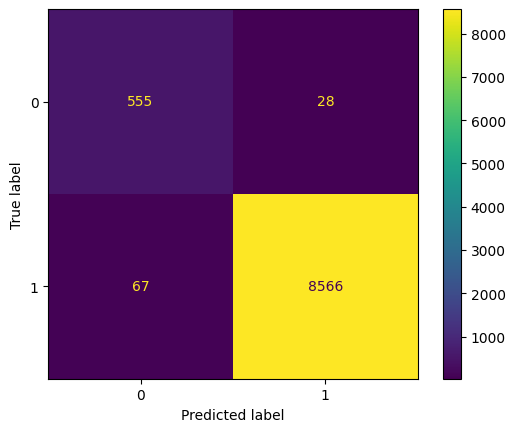

288/288 [==============================] - 1s 2ms/step
ROC AUC: 0.9885


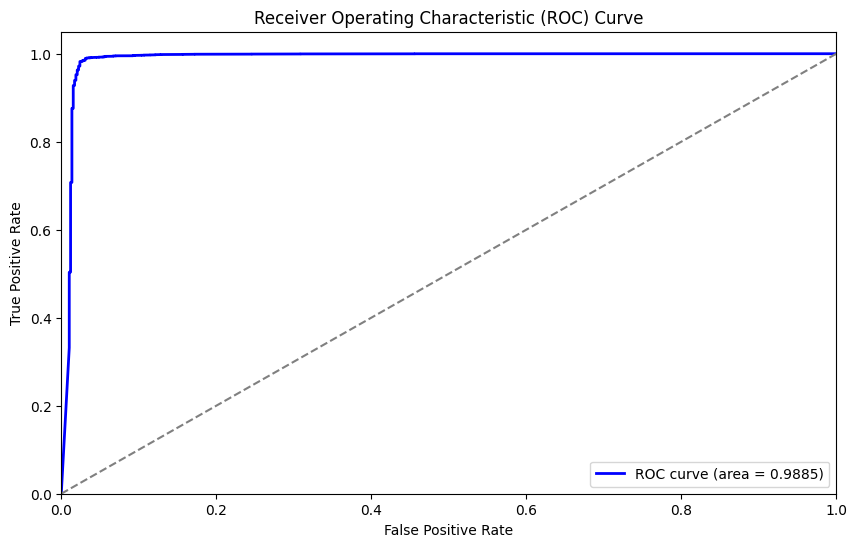

Mean Absolute Error (MAE): 0.0103
Mean Squared Error (MSE): 0.0103
Root Mean Squared Error (RMSE): 0.1015
Log Loss: 0.0415
Huber Loss: 0.0042
R-squared Error: 0.8260
Mean Absolute Percentage Error (MAPE): 13682811367879.1172


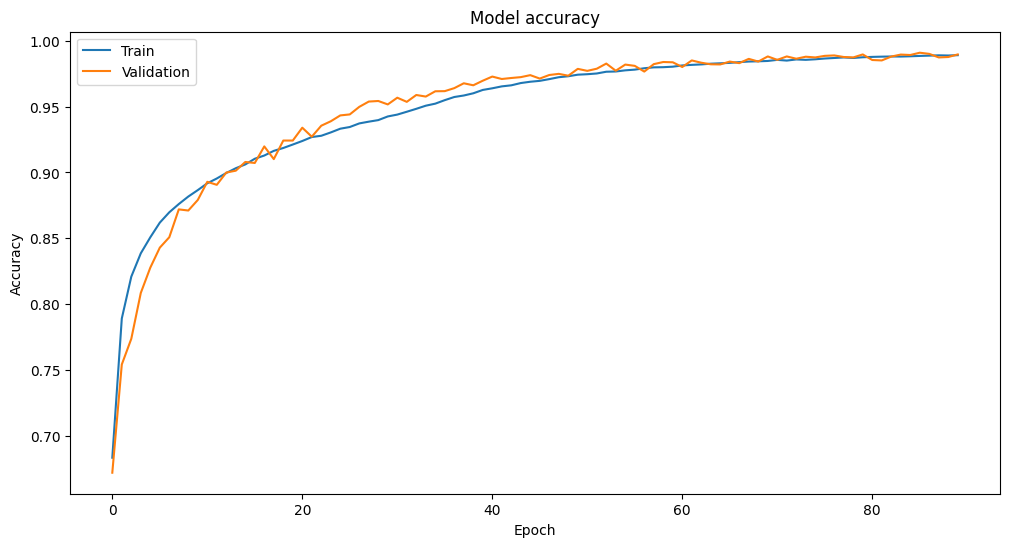

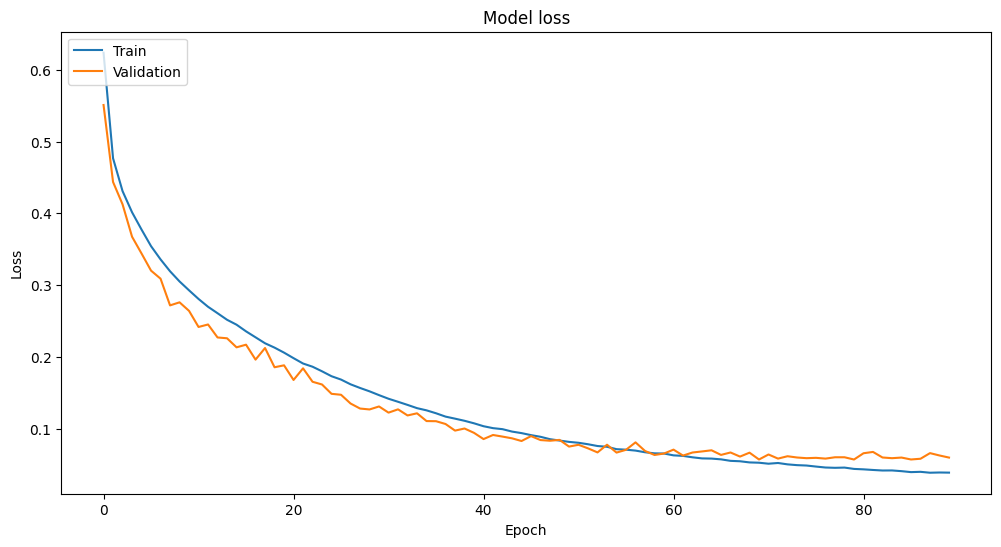

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for GRU [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the GRU model without batch normalization
def create_model():
    model = Sequential([
        GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        GRU(64, activation='relu', return_sequences=False),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING GRU at 0.2 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
359/359 [==============================] - 6s 10ms/step - loss: 0.6653 - accuracy: 0.6468 - val_loss: 0.6118 - val_accuracy: 0.7164
Epoch 2/120
 15/359 [>.............................] - ETA: 2s - loss: 0.6172 - accuracy: 0.7031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


359/359 [==============================] - 3s 9ms/step - loss: 0.5457 - accuracy: 0.7495 - val_loss: 0.4839 - val_accuracy: 0.7907
Epoch 3/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4690 - accuracy: 0.7916 - val_loss: 0.4389 - val_accuracy: 0.8195
Epoch 4/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4395 - accuracy: 0.8140 - val_loss: 0.4140 - val_accuracy: 0.8357
Epoch 5/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4190 - accuracy: 0.8260 - val_loss: 0.3937 - val_accuracy: 0.8491
Epoch 6/120
359/359 [==============================] - 3s 9ms/step - loss: 0.4002 - accuracy: 0.8377 - val_loss: 0.3752 - val_accuracy: 0.8559
Epoch 7/120
359/359 [==============================] - 3s 8ms/step - loss: 0.3840 - accuracy: 0.8474 - val_loss: 0.3572 - val_accuracy: 0.8685
Epoch 8/120
359/359 [==============================] - 3s 8ms/step - loss: 0.3698 - accuracy: 0.8541 - val_loss: 0.3408 - val_accuracy: 0.8759
Epoch 9/120

Epoch 1/120
359/359 [==============================] - 6s 10ms/step - loss: 0.6679 - accuracy: 0.6279 - val_loss: 0.6156 - val_accuracy: 0.7059
Epoch 2/120
359/359 [==============================] - 3s 9ms/step - loss: 0.5500 - accuracy: 0.7462 - val_loss: 0.4844 - val_accuracy: 0.7902
Epoch 3/120
359/359 [==============================] - 3s 9ms/step - loss: 0.4713 - accuracy: 0.7906 - val_loss: 0.4344 - val_accuracy: 0.8185
Epoch 4/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4397 - accuracy: 0.8133 - val_loss: 0.4076 - val_accuracy: 0.8362
Epoch 5/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4199 - accuracy: 0.8279 - val_loss: 0.3870 - val_accuracy: 0.8459
Epoch 6/120
359/359 [==============================] - 3s 9ms/step - loss: 0.4013 - accuracy: 0.8381 - val_loss: 0.3680 - val_accuracy: 0.8604
Epoch 7/120
359/359 [==============================] - 3s 9ms/step - loss: 0.3851 - accuracy: 0.8486 - val_loss: 0.3497 - val_accuracy: 0.868

Epoch 1/120
359/359 [==============================] - 6s 10ms/step - loss: 0.6672 - accuracy: 0.6436 - val_loss: 0.6108 - val_accuracy: 0.7157
Epoch 2/120
359/359 [==============================] - 3s 9ms/step - loss: 0.5448 - accuracy: 0.7528 - val_loss: 0.4785 - val_accuracy: 0.7993
Epoch 3/120
359/359 [==============================] - 3s 9ms/step - loss: 0.4704 - accuracy: 0.7921 - val_loss: 0.4338 - val_accuracy: 0.8218
Epoch 4/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4397 - accuracy: 0.8132 - val_loss: 0.4083 - val_accuracy: 0.8355
Epoch 5/120
359/359 [==============================] - 3s 8ms/step - loss: 0.4197 - accuracy: 0.8258 - val_loss: 0.3877 - val_accuracy: 0.8493
Epoch 6/120
359/359 [==============================] - 3s 9ms/step - loss: 0.4015 - accuracy: 0.8363 - val_loss: 0.3684 - val_accuracy: 0.8580
Epoch 7/120
359/359 [==============================] - 3s 9ms/step - loss: 0.3851 - accuracy: 0.8444 - val_loss: 0.3511 - val_accuracy: 0.869

Validation Accuracy: 0.9863
Mean Validation Accuracy: 0.9872
Epoch 1/120
538/538 [==============================] - 7s 8ms/step - loss: 0.6344 - accuracy: 0.6805 - val_loss: 0.5536 - val_accuracy: 0.6654
Epoch 2/120
538/538 [==============================] - 4s 8ms/step - loss: 0.4859 - accuracy: 0.7807 - val_loss: 0.4649 - val_accuracy: 0.7373
Epoch 3/120
538/538 [==============================] - 4s 8ms/step - loss: 0.4358 - accuracy: 0.8172 - val_loss: 0.4417 - val_accuracy: 0.7564
Epoch 4/120
538/538 [==============================] - 4s 8ms/step - loss: 0.4088 - accuracy: 0.8332 - val_loss: 0.3946 - val_accuracy: 0.7926
Epoch 5/120
538/538 [==============================] - 4s 8ms/step - loss: 0.3851 - accuracy: 0.8470 - val_loss: 0.3563 - val_accuracy: 0.8229
Epoch 6/120
538/538 [==============================] - 4s 8ms/step - loss: 0.3628 - accuracy: 0.8570 - val_loss: 0.3470 - val_accuracy: 0.8300
Epoch 7/120
538/538 [==============================] - 4s 8ms/step - loss: 0.3441

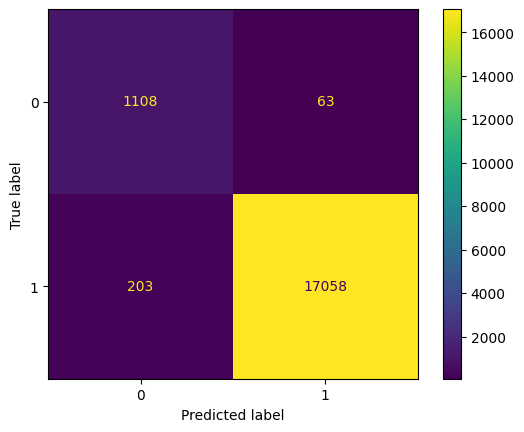

576/576 [==============================] - 1s 2ms/step
ROC AUC: 0.9844


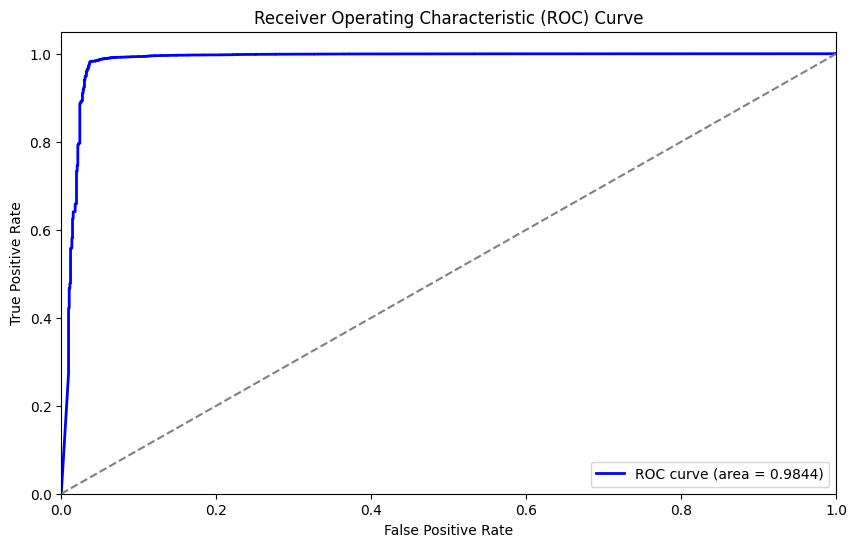

Mean Absolute Error (MAE): 0.0144
Mean Squared Error (MSE): 0.0144
Root Mean Squared Error (RMSE): 0.1201
Log Loss: 0.0537
Huber Loss: 0.0057
R-squared Error: 0.7574
Mean Absolute Percentage Error (MAPE): 15393162788864.0117


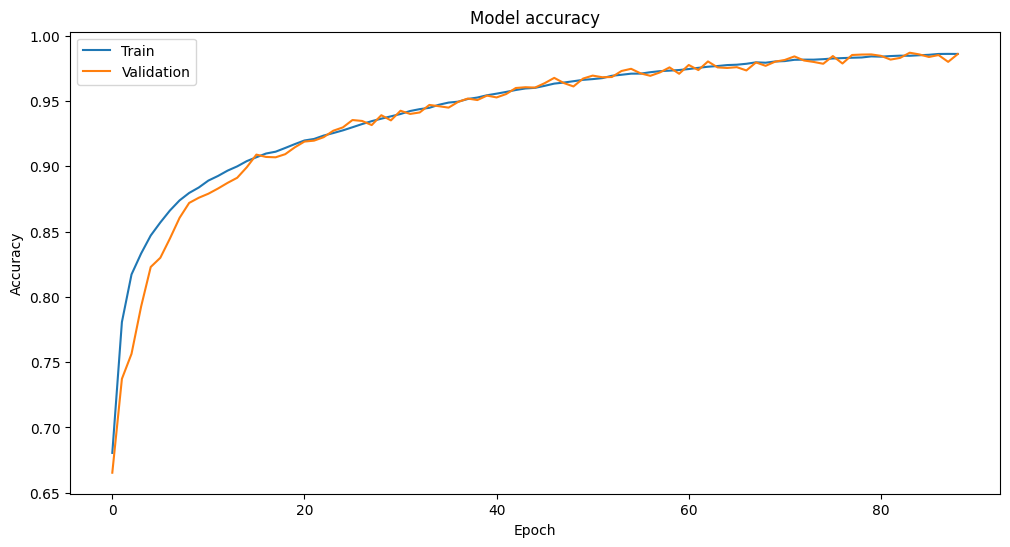

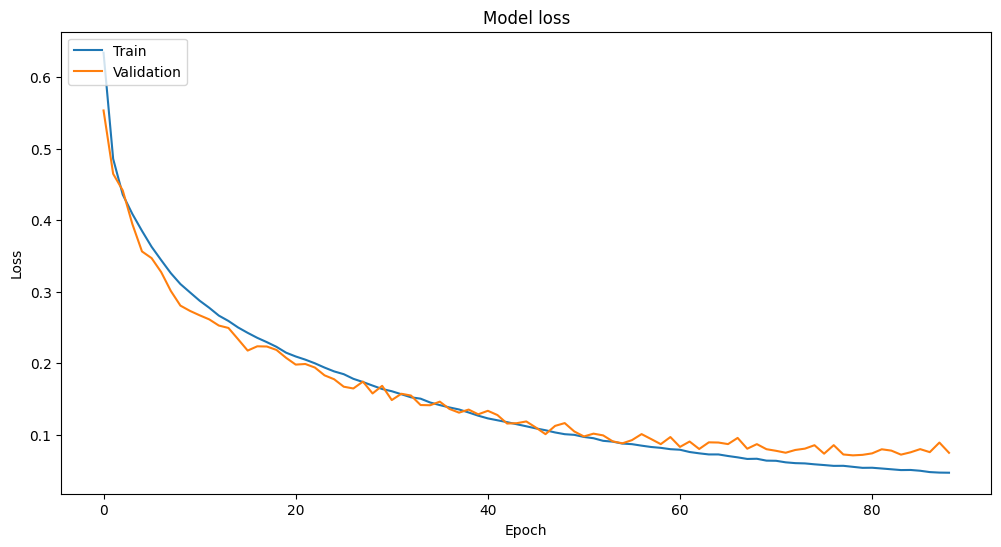

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for GRU [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the GRU model without batch normalization
def create_model():
    model = Sequential([
        GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        GRU(64, activation='relu', return_sequences=False),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING GRU at 0.3 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
314/314 [==============================] - 6s 10ms/step - loss: 0.6763 - accuracy: 0.6011 - val_loss: 0.6384 - val_accuracy: 0.6711
Epoch 2/120
 23/314 [=>............................] - ETA: 2s - loss: 0.6392 - accuracy: 0.6693

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


314/314 [==============================] - 3s 9ms/step - loss: 0.5814 - accuracy: 0.7232 - val_loss: 0.5130 - val_accuracy: 0.7745
Epoch 3/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4909 - accuracy: 0.7788 - val_loss: 0.4516 - val_accuracy: 0.8086
Epoch 4/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4525 - accuracy: 0.8039 - val_loss: 0.4216 - val_accuracy: 0.8319
Epoch 5/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4314 - accuracy: 0.8206 - val_loss: 0.4007 - val_accuracy: 0.8417
Epoch 6/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4141 - accuracy: 0.8307 - val_loss: 0.3829 - val_accuracy: 0.8528
Epoch 7/120
314/314 [==============================] - 3s 9ms/step - loss: 0.3979 - accuracy: 0.8397 - val_loss: 0.3665 - val_accuracy: 0.8620
Epoch 8/120
314/314 [==============================] - 3s 9ms/step - loss: 0.3835 - accuracy: 0.8491 - val_loss: 0.3511 - val_accuracy: 0.8681
Epoch 9/120

Epoch 1/120
314/314 [==============================] - 6s 10ms/step - loss: 0.6708 - accuracy: 0.6519 - val_loss: 0.6259 - val_accuracy: 0.7150
Epoch 2/120
314/314 [==============================] - 3s 9ms/step - loss: 0.5632 - accuracy: 0.7412 - val_loss: 0.5003 - val_accuracy: 0.7799
Epoch 3/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4836 - accuracy: 0.7813 - val_loss: 0.4508 - val_accuracy: 0.8099
Epoch 4/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4522 - accuracy: 0.8038 - val_loss: 0.4246 - val_accuracy: 0.8279
Epoch 5/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4309 - accuracy: 0.8185 - val_loss: 0.4047 - val_accuracy: 0.8401
Epoch 6/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4138 - accuracy: 0.8285 - val_loss: 0.3870 - val_accuracy: 0.8497
Epoch 7/120
314/314 [==============================] - 3s 9ms/step - loss: 0.3983 - accuracy: 0.8386 - val_loss: 0.3702 - val_accuracy: 0.860

Epoch 1/120
314/314 [==============================] - 6s 10ms/step - loss: 0.6739 - accuracy: 0.6421 - val_loss: 0.6317 - val_accuracy: 0.7269
Epoch 2/120
314/314 [==============================] - 3s 9ms/step - loss: 0.5677 - accuracy: 0.7426 - val_loss: 0.4994 - val_accuracy: 0.7860
Epoch 3/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4852 - accuracy: 0.7804 - val_loss: 0.4504 - val_accuracy: 0.8128
Epoch 4/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4543 - accuracy: 0.8029 - val_loss: 0.4262 - val_accuracy: 0.8252
Epoch 5/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4339 - accuracy: 0.8172 - val_loss: 0.4071 - val_accuracy: 0.8397
Epoch 6/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4161 - accuracy: 0.8288 - val_loss: 0.3899 - val_accuracy: 0.8502
Epoch 7/120
314/314 [==============================] - 3s 9ms/step - loss: 0.4005 - accuracy: 0.8371 - val_loss: 0.3739 - val_accuracy: 0.854

Validation Accuracy: 0.9860
Mean Validation Accuracy: 0.9869
Epoch 1/120
471/471 [==============================] - 7s 9ms/step - loss: 0.6494 - accuracy: 0.6647 - val_loss: 0.5889 - val_accuracy: 0.6226
Epoch 2/120
471/471 [==============================] - 4s 8ms/step - loss: 0.5065 - accuracy: 0.7684 - val_loss: 0.4833 - val_accuracy: 0.7302
Epoch 3/120
471/471 [==============================] - 4s 8ms/step - loss: 0.4500 - accuracy: 0.8062 - val_loss: 0.4356 - val_accuracy: 0.7666
Epoch 4/120
471/471 [==============================] - 4s 8ms/step - loss: 0.4222 - accuracy: 0.8254 - val_loss: 0.4063 - val_accuracy: 0.7862
Epoch 5/120
471/471 [==============================] - 4s 8ms/step - loss: 0.4002 - accuracy: 0.8391 - val_loss: 0.3785 - val_accuracy: 0.8078
Epoch 6/120
471/471 [==============================] - 4s 8ms/step - loss: 0.3793 - accuracy: 0.8500 - val_loss: 0.3529 - val_accuracy: 0.8254
Epoch 7/120
471/471 [==============================] - 4s 8ms/step - loss: 0.3587

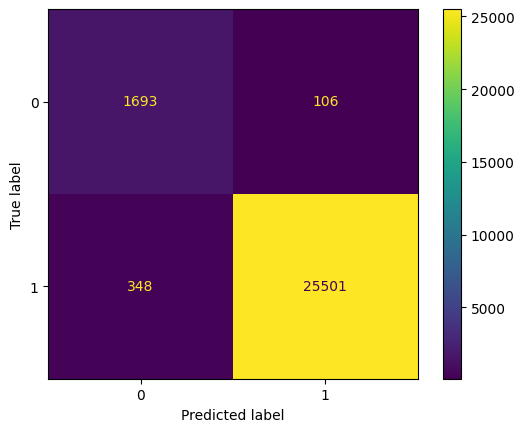

864/864 [==============================] - 2s 2ms/step
ROC AUC: 0.9840


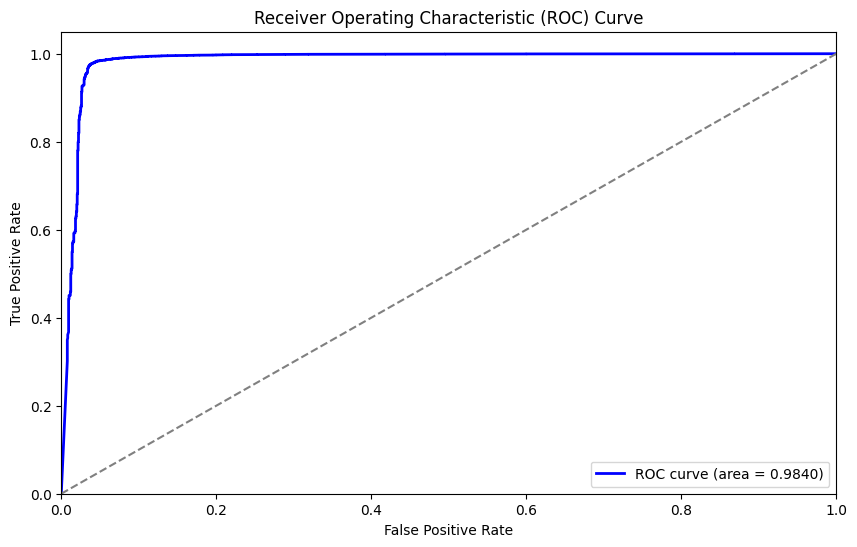

Mean Absolute Error (MAE): 0.0164
Mean Squared Error (MSE): 0.0164
Root Mean Squared Error (RMSE): 0.1281
Log Loss: 0.0593
Huber Loss: 0.0064
R-squared Error: 0.7301
Mean Absolute Percentage Error (MAPE): 17266404821371.2734


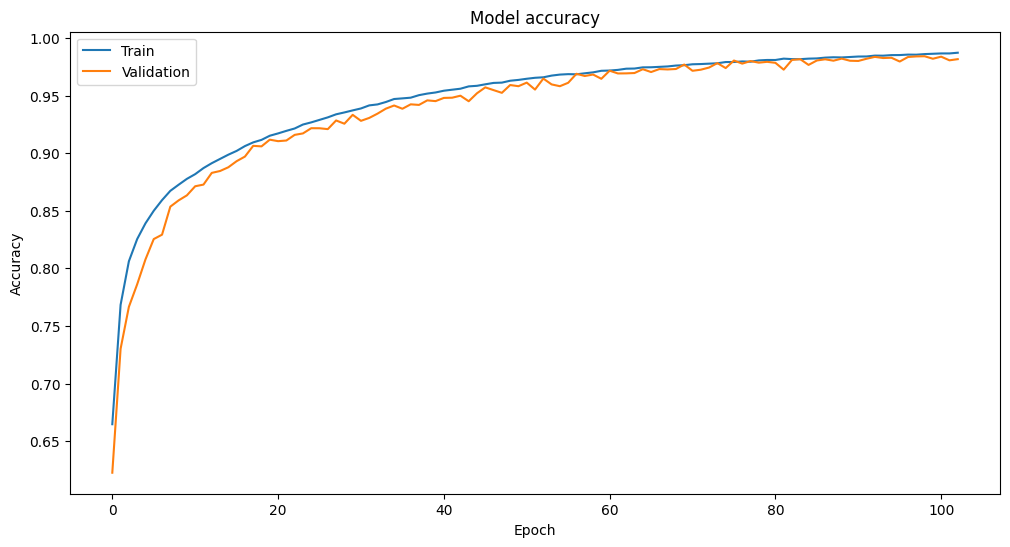

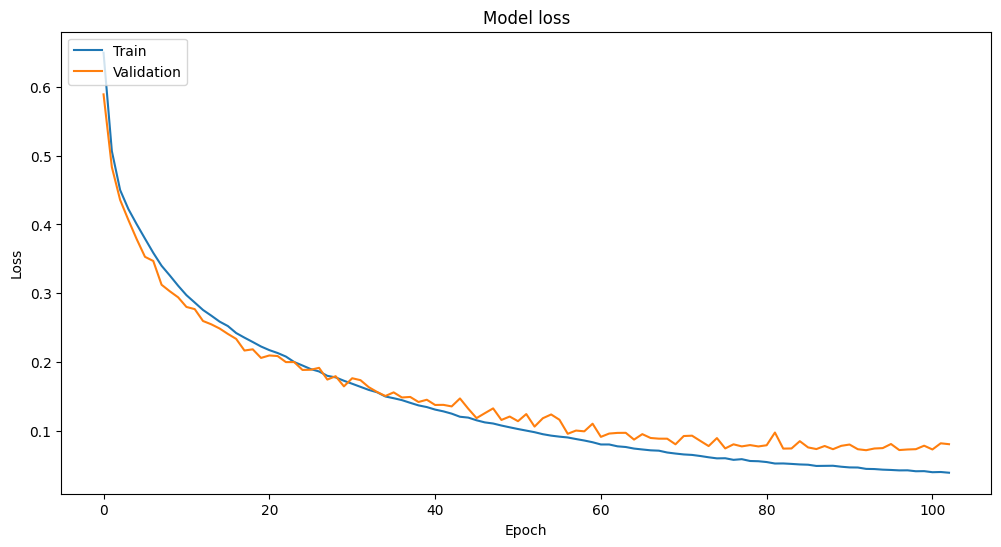

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for GRU [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the GRU model without batch normalization
def create_model():
    model = Sequential([
        GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        GRU(64, activation='relu', return_sequences=False),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING GRU at 0.4 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
269/269 [==============================] - 6s 11ms/step - loss: 0.6760 - accuracy: 0.6382 - val_loss: 0.6445 - val_accuracy: 0.7043
Epoch 2/120
 15/269 [>.............................] - ETA: 2s - loss: 0.6454 - accuracy: 0.6917

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


269/269 [==============================] - 2s 9ms/step - loss: 0.5916 - accuracy: 0.7262 - val_loss: 0.5272 - val_accuracy: 0.7659
Epoch 3/120
269/269 [==============================] - 2s 9ms/step - loss: 0.5044 - accuracy: 0.7693 - val_loss: 0.4660 - val_accuracy: 0.7999
Epoch 4/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4667 - accuracy: 0.7957 - val_loss: 0.4369 - val_accuracy: 0.8203
Epoch 5/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4467 - accuracy: 0.8091 - val_loss: 0.4173 - val_accuracy: 0.8323
Epoch 6/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4297 - accuracy: 0.8205 - val_loss: 0.4009 - val_accuracy: 0.8457
Epoch 7/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4153 - accuracy: 0.8299 - val_loss: 0.3851 - val_accuracy: 0.8490
Epoch 8/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4012 - accuracy: 0.8376 - val_loss: 0.3705 - val_accuracy: 0.8574
Epoch 9/120

Epoch 1/120
269/269 [==============================] - 6s 11ms/step - loss: 0.6747 - accuracy: 0.6423 - val_loss: 0.6400 - val_accuracy: 0.6958
Epoch 2/120
269/269 [==============================] - 2s 9ms/step - loss: 0.5868 - accuracy: 0.7298 - val_loss: 0.5273 - val_accuracy: 0.7611
Epoch 3/120
269/269 [==============================] - 2s 9ms/step - loss: 0.5024 - accuracy: 0.7689 - val_loss: 0.4691 - val_accuracy: 0.7965
Epoch 4/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4635 - accuracy: 0.7959 - val_loss: 0.4394 - val_accuracy: 0.8172
Epoch 5/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4439 - accuracy: 0.8126 - val_loss: 0.4194 - val_accuracy: 0.8307
Epoch 6/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4255 - accuracy: 0.8235 - val_loss: 0.4021 - val_accuracy: 0.8416
Epoch 7/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4120 - accuracy: 0.8321 - val_loss: 0.3868 - val_accuracy: 0.847

Epoch 1/120
269/269 [==============================] - 9s 11ms/step - loss: 0.6810 - accuracy: 0.6056 - val_loss: 0.6540 - val_accuracy: 0.6560
Epoch 2/120
269/269 [==============================] - 3s 9ms/step - loss: 0.6043 - accuracy: 0.7102 - val_loss: 0.5389 - val_accuracy: 0.7633
Epoch 3/120
269/269 [==============================] - 2s 9ms/step - loss: 0.5084 - accuracy: 0.7686 - val_loss: 0.4683 - val_accuracy: 0.8020
Epoch 4/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4644 - accuracy: 0.7962 - val_loss: 0.4374 - val_accuracy: 0.8217
Epoch 5/120
269/269 [==============================] - 2s 9ms/step - loss: 0.4414 - accuracy: 0.8123 - val_loss: 0.4171 - val_accuracy: 0.8341
Epoch 6/120
269/269 [==============================] - 3s 10ms/step - loss: 0.4249 - accuracy: 0.8233 - val_loss: 0.4005 - val_accuracy: 0.8422
Epoch 7/120
269/269 [==============================] - 3s 9ms/step - loss: 0.4103 - accuracy: 0.8321 - val_loss: 0.3853 - val_accuracy: 0.85

Validation Accuracy: 0.9798
Mean Validation Accuracy: 0.9795


Epoch 1/120
403/403 [==============================] - 7s 10ms/step - loss: 0.6575 - accuracy: 0.6750 - val_loss: 0.6030 - val_accuracy: 0.5981
Epoch 2/120
403/403 [==============================] - 3s 9ms/step - loss: 0.5199 - accuracy: 0.7626 - val_loss: 0.4795 - val_accuracy: 0.7313
Epoch 3/120
403/403 [==============================] - 4s 9ms/step - loss: 0.4605 - accuracy: 0.8011 - val_loss: 0.4452 - val_accuracy: 0.7573
Epoch 4/120
403/403 [==============================] - 3s 9ms/step - loss: 0.4318 - accuracy: 0.8195 - val_loss: 0.4308 - val_accuracy: 0.7662
Epoch 5/120
403/403 [==============================] - 3s 8ms/step - loss: 0.4107 - accuracy: 0.8320 - val_loss: 0.3879 - val_accuracy: 0.7974
Epoch 6/120
403/403 [==============================] - 4s 9ms/step - loss: 0.3919 - accuracy: 0.8425 - val_loss: 0.3676 - val_accuracy: 0.8121
Epoch 7/120
403/403 [==============================] - 3s 8ms/step - loss: 0.3733 - accuracy: 0.8515 - val_loss: 0.3556 - val_accuracy: 0.820

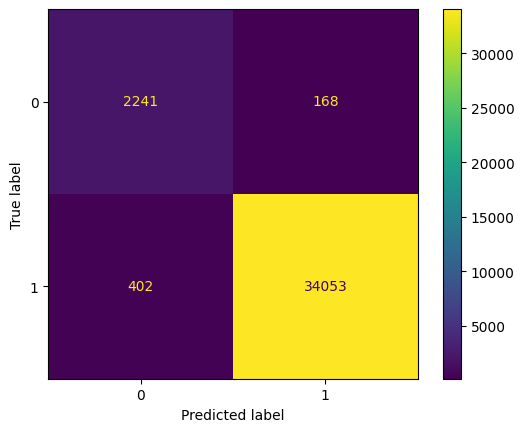

1152/1152 [==============================] - 2s 2ms/step
ROC AUC: 0.9833


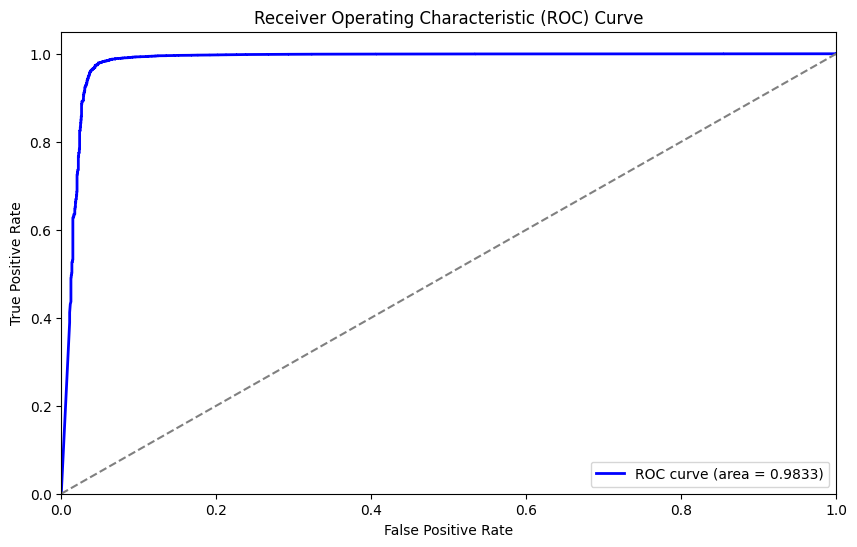

Mean Absolute Error (MAE): 0.0155
Mean Squared Error (MSE): 0.0155
Root Mean Squared Error (RMSE): 0.1243
Log Loss: 0.0600
Huber Loss: 0.0062
R-squared Error: 0.7468
Mean Absolute Percentage Error (MAPE): 20524217051818.6758


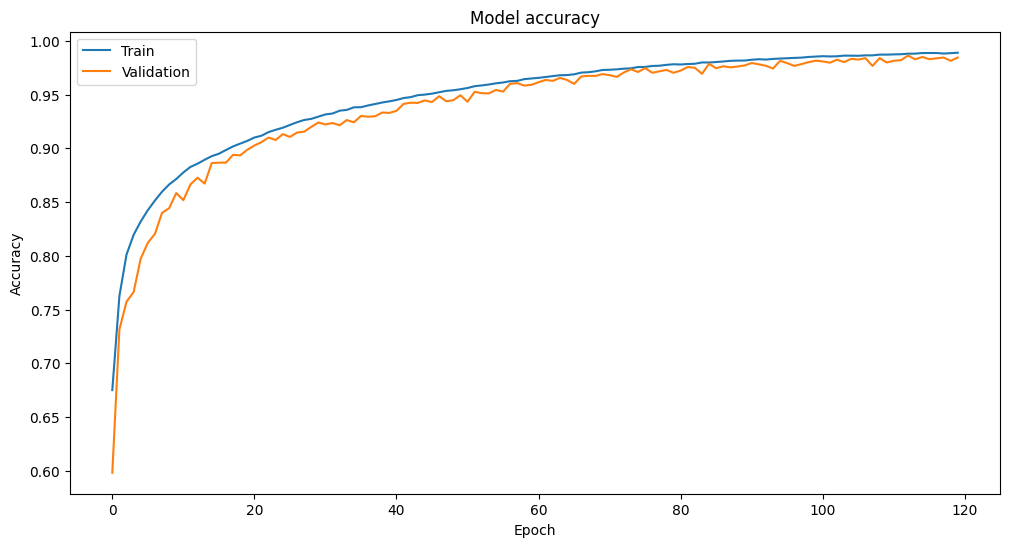

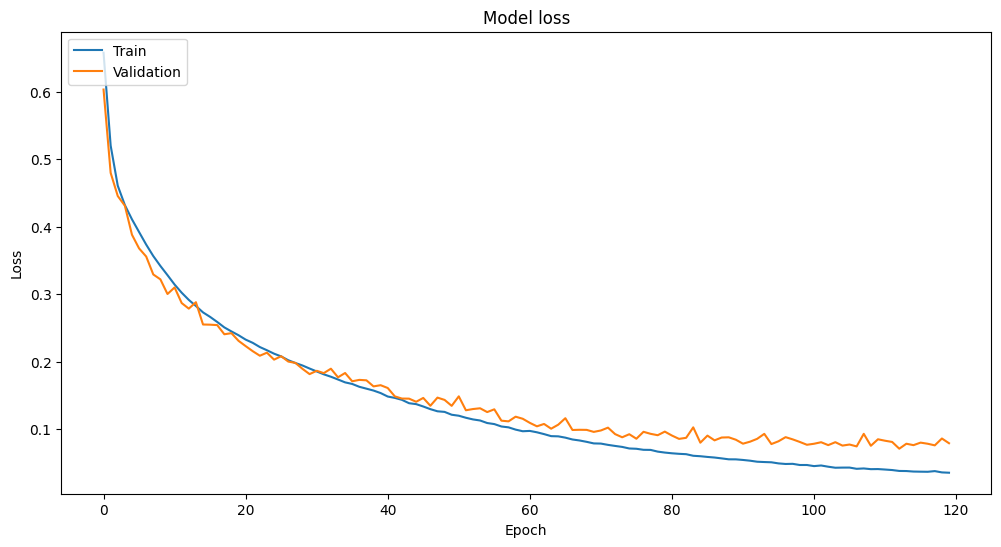

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for GRU [samples, timesteps, features]
X_train_res = X_train_res.reshape((X_train_res.shape[0], 1, X_train_res.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train_res).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train_res).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the GRU model without batch normalization
def create_model():
    model = Sequential([
        GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2])),
        Dropout(0.4),
        GRU(64, activation='relu', return_sequences=False),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_res):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_res, y_train_res)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING classic lstm+ 1D CNNat 0.1 test dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for CNN and LSTM [samples, timesteps, features]
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check for NaN values
print("NaN values in X_train_resampled:", np.isnan(X_train_resampled).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train_resampled:", np.isnan(y_train_resampled).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define a function to create the hybrid 1-D CNN and LSTM model with dropout
def create_model():
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Perform k-fold cross-validation manually
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1
validation_accuracies = []
for train_index, val_index in kf.split(X_train_resampled):
    print(f"Training fold {fold_no}...")
    fold_no += 1
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

    history = model.fit(X_train_fold, y_train_fold, epochs=120, batch_size=256, validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    validation_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean Validation Accuracy: {np.mean(validation_accuracies):.4f}")

# Fit the model on the entire training data
model = create_model()
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                               ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')],
                    epochs=120, batch_size=256, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING classic lstm+ 1D CNNat 0.2 test dataset

NaN values in X_train_resampled: 0
NaN values in X_test: 0
NaN values in y_train_resampled: 0
NaN values in y_test: 0
Epoch 1/120
860/860 [==============================] - 10s 10ms/step - loss: 1.6092 - accuracy: 0.6278 - val_loss: 1.1624 - val_accuracy: 0.0409
Epoch 2/120
860/860 [==============================] - 7s 8ms/step - loss: 0.7438 - accuracy: 0.6744 - val_loss: 0.8885 - val_accuracy: 0.3744
Epoch 3/120
860/860 [==============================] - 7s 8ms/step - loss: 0.6378 - accuracy: 0.7330 - val_loss: 0.8312 - val_accuracy: 0.6248
Epoch 4/120
860/860 [==============================] - 7s 8ms/step - loss: 0.6162 - accuracy: 0.7750 - val_loss: 0.8644 - val_accuracy: 0.6181
Epoch 5/120
860/860 [==============================] - 7s 8ms/step - loss: 0.6054 - accuracy: 0.8125 - val_loss: 0.7687 - val_accuracy: 0.9315
Epoch 6/120
860/860 [==============================] - 7s 8ms/step - loss: 0.5957 - accuracy: 0.8431 - val_loss: 0.6916 - val_accuracy: 0.9513
Epoch 7/120
860/860 [=

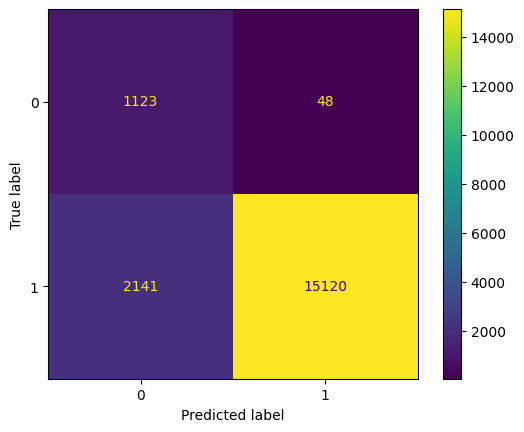

576/576 [==============================] - 1s 2ms/step
ROC AUC: 0.9739


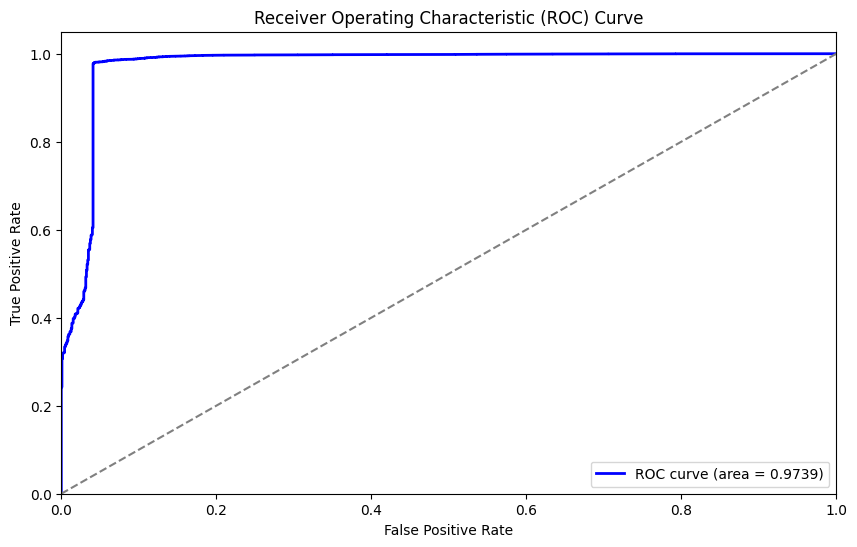

Mean Absolute Error (MAE): 0.1188
Mean Squared Error (MSE): 0.1188
Root Mean Squared Error (RMSE): 0.3446
Log Loss: 0.2329
Huber Loss: 0.0354
R-squared Error: -0.9962
Mean Absolute Percentage Error (MAPE): 11728124029610.7852


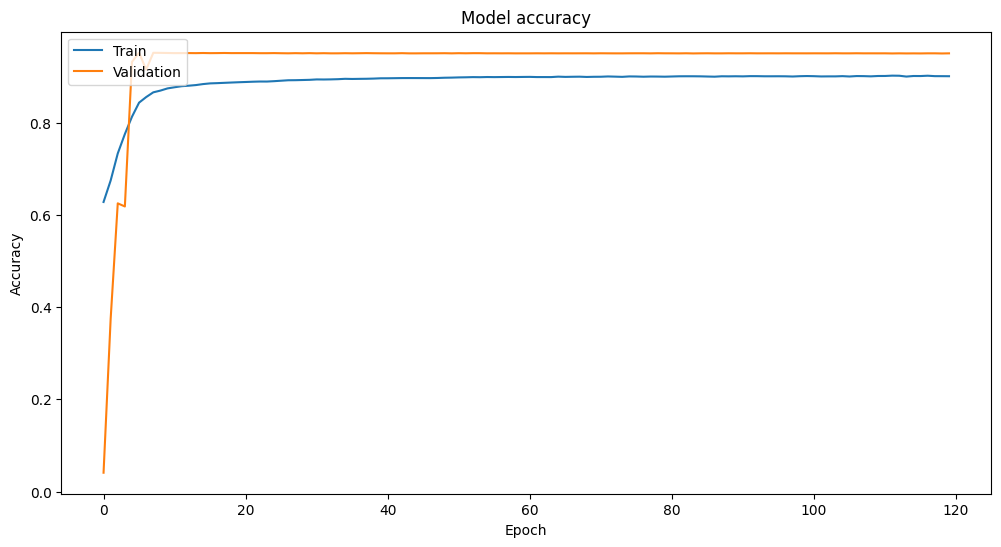

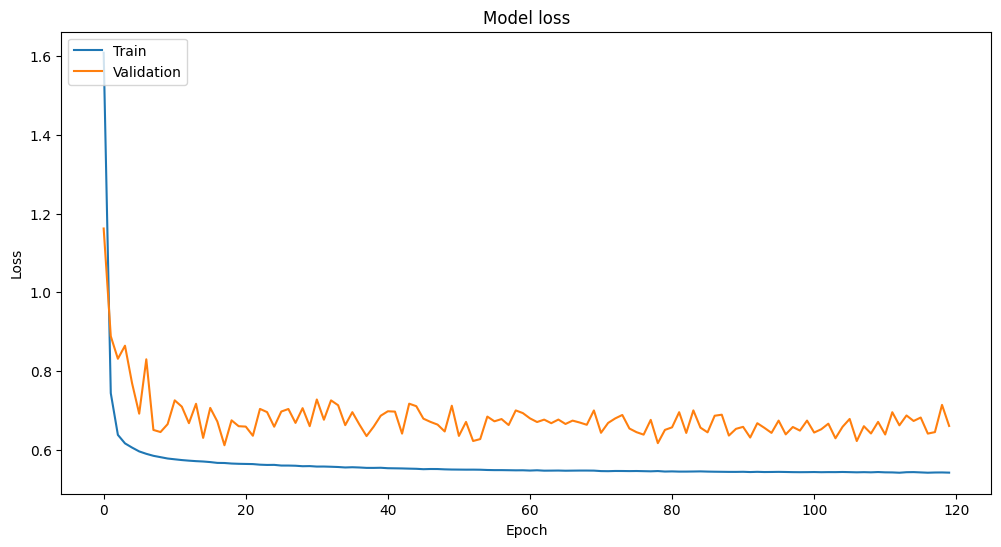

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for CNN and LSTM [samples, timesteps, features]
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check for NaN values
print("NaN values in X_train_resampled:", np.isnan(X_train_resampled).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train_resampled:", np.isnan(y_train_resampled).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

from tensorflow.keras.regularizers import l2

# Define the hybrid 1-D CNN and LSTM model with L2 regularization
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

# Callback for saving the best model
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=120, batch_size=128, validation_split=0.2,
                    callbacks=[model_checkpoint],
                    class_weight=class_weights)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING classic lstm+ 1D CNNat 0.3 test dataset

NaN values in X_train_resampled: 0
NaN values in X_test: 0
NaN values in y_train_resampled: 0
NaN values in y_test: 0
Epoch 1/120
753/753 [==============================] - 8s 9ms/step - loss: 1.6999 - accuracy: 0.6242 - val_loss: 1.1792 - val_accuracy: 0.0075
Epoch 2/120
753/753 [==============================] - 6s 8ms/step - loss: 0.7939 - accuracy: 0.6553 - val_loss: 1.0934 - val_accuracy: 0.0019
Epoch 3/120
753/753 [==============================] - 6s 8ms/step - loss: 0.6584 - accuracy: 0.7064 - val_loss: 1.0474 - val_accuracy: 0.0549
Epoch 4/120
753/753 [==============================] - 6s 8ms/step - loss: 0.6302 - accuracy: 0.7391 - val_loss: 0.6961 - val_accuracy: 0.9457
Epoch 5/120
753/753 [==============================] - 6s 8ms/step - loss: 0.6211 - accuracy: 0.7721 - val_loss: 0.7664 - val_accuracy: 0.8810
Epoch 6/120
753/753 [==============================] - 6s 8ms/step - loss: 0.6080 - accuracy: 0.8137 - val_loss: 0.9026 - val_accuracy: 0.5947
Epoch 7/120
753/753 [===

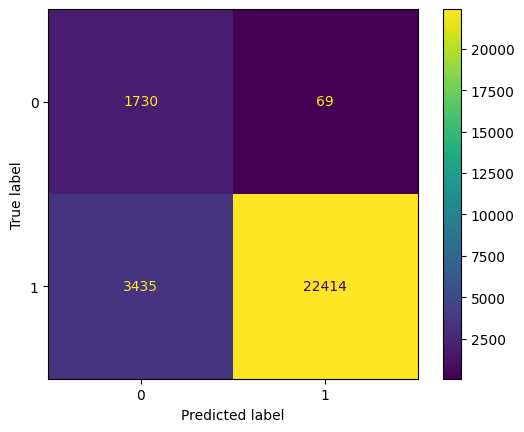

864/864 [==============================] - 1s 1ms/step
ROC AUC: 0.9755


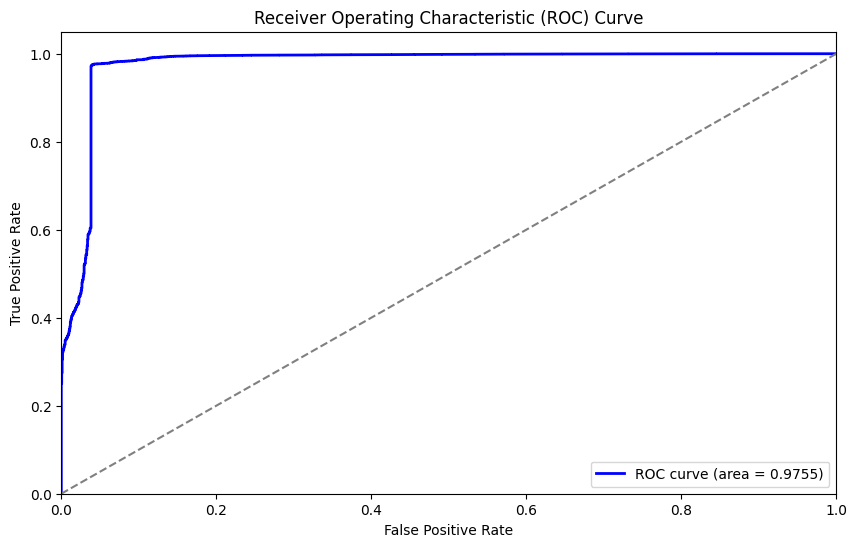

Mean Absolute Error (MAE): 0.1267
Mean Squared Error (MSE): 0.1267
Root Mean Squared Error (RMSE): 0.3560
Log Loss: 0.2451
Huber Loss: 0.0375
R-squared Error: -1.0833
Mean Absolute Percentage Error (MAPE): 11239452195043.6797


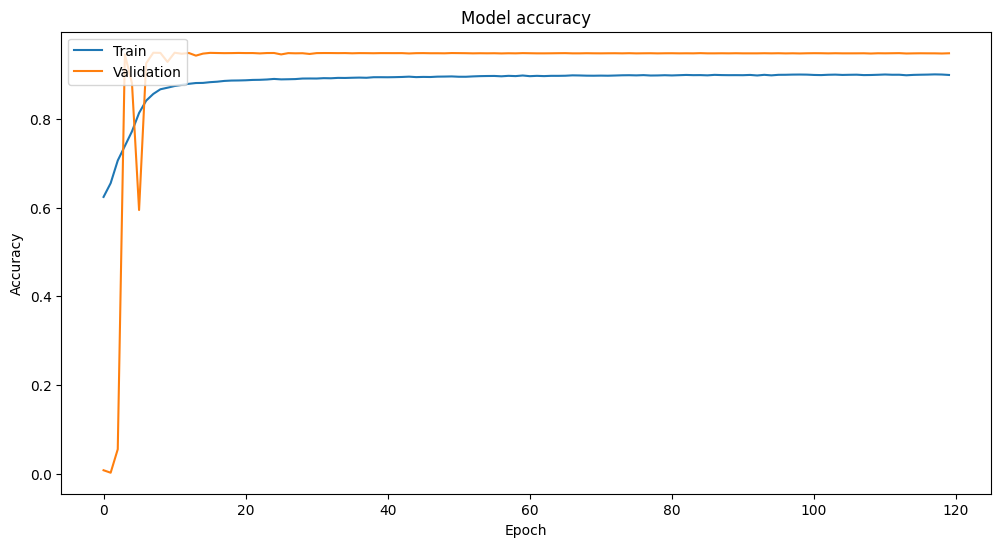

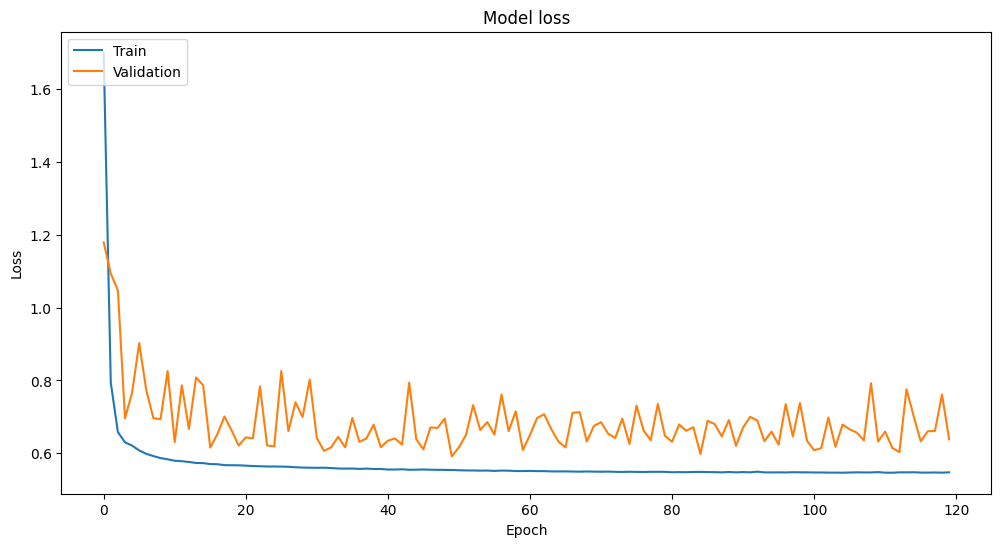

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for CNN and LSTM [samples, timesteps, features]
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check for NaN values
print("NaN values in X_train_resampled:", np.isnan(X_train_resampled).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train_resampled:", np.isnan(y_train_resampled).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

from tensorflow.keras.regularizers import l2

# Define the hybrid 1-D CNN and LSTM model with L2 regularization
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

# Callback for saving the best model
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=120, batch_size=128, validation_split=0.2,
                    callbacks=[model_checkpoint],
                    class_weight=class_weights)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


APPLYING classic lstm+ 1D CNNat 0.4 test dataset

NaN values in X_train_resampled: 0
NaN values in X_test: 0
NaN values in y_train_resampled: 0
NaN values in y_test: 0
Epoch 1/120
645/645 [==============================] - 8s 10ms/step - loss: 1.8231 - accuracy: 0.6350 - val_loss: 1.2662 - val_accuracy: 0.1953
Epoch 2/120
645/645 [==============================] - 5s 8ms/step - loss: 0.8484 - accuracy: 0.6807 - val_loss: 0.9313 - val_accuracy: 0.3814
Epoch 3/120
645/645 [==============================] - 5s 8ms/step - loss: 0.6756 - accuracy: 0.7270 - val_loss: 0.7203 - val_accuracy: 0.9037
Epoch 4/120
645/645 [==============================] - 5s 8ms/step - loss: 0.6296 - accuracy: 0.7602 - val_loss: 0.9176 - val_accuracy: 0.3717
Epoch 5/120
645/645 [==============================] - 5s 8ms/step - loss: 0.6134 - accuracy: 0.7909 - val_loss: 0.8652 - val_accuracy: 0.5996
Epoch 6/120
645/645 [==============================] - 5s 8ms/step - loss: 0.6035 - accuracy: 0.8217 - val_loss: 0.7738 - val_accuracy: 0.8831
Epoch 7/120
645/645 [==

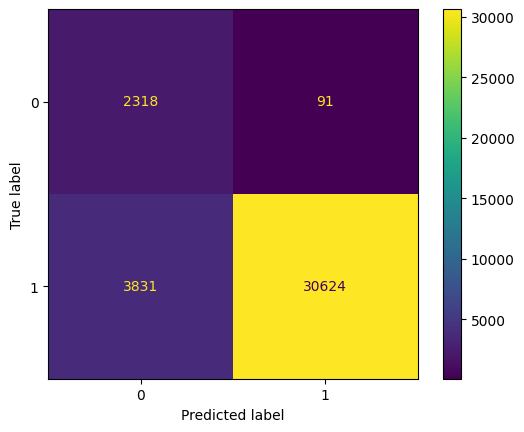

1152/1152 [==============================] - 2s 1ms/step
ROC AUC: 0.9777


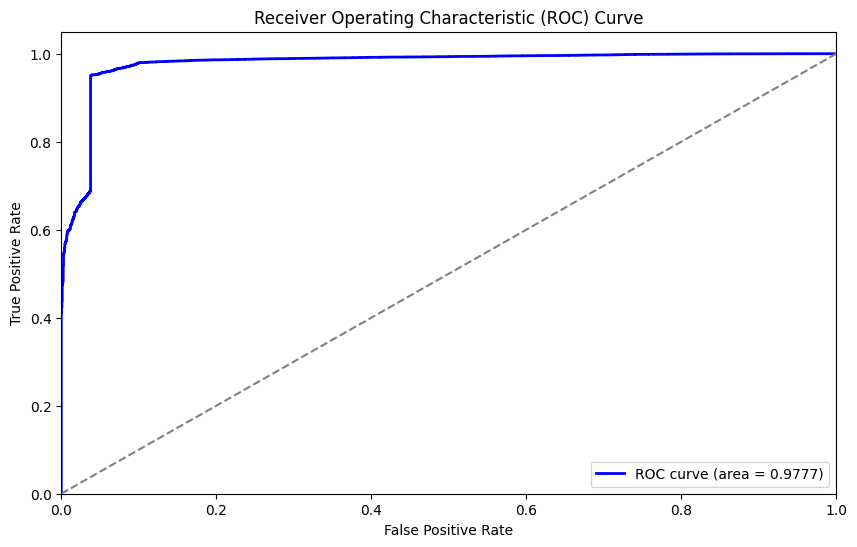

Mean Absolute Error (MAE): 0.1064
Mean Squared Error (MSE): 0.1064
Root Mean Squared Error (RMSE): 0.3262
Log Loss: 0.2201
Huber Loss: 0.0328
R-squared Error: -0.7419
Mean Absolute Percentage Error (MAPE): 11117284236401.8828


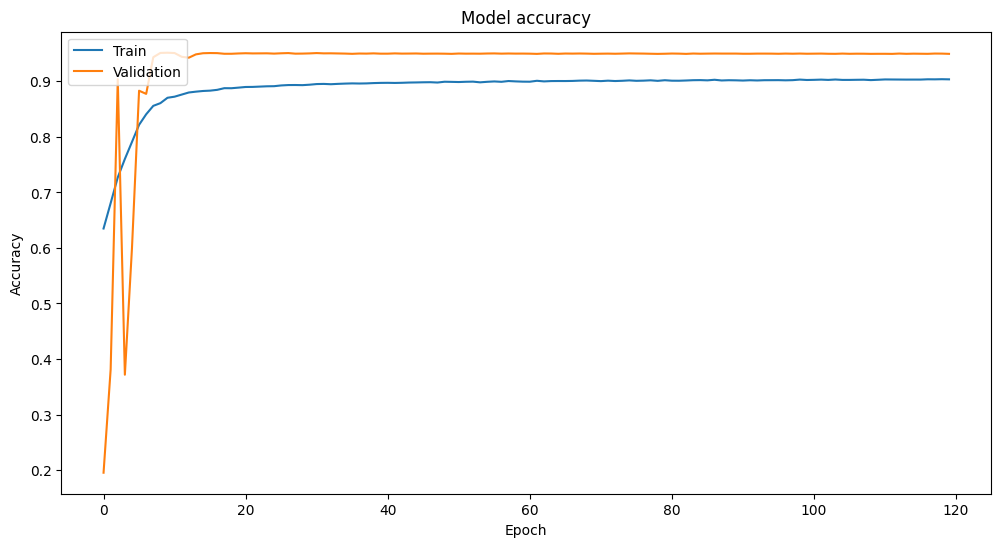

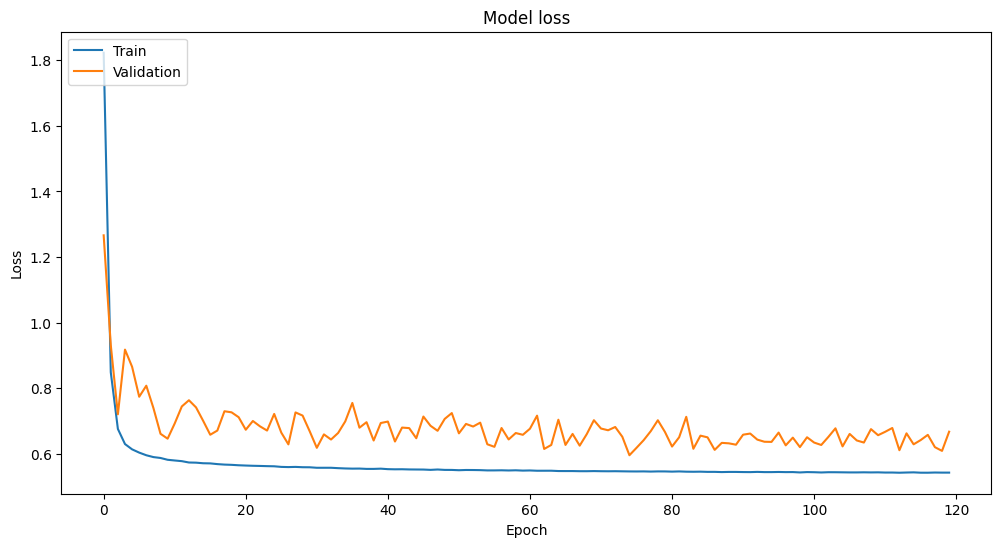

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Reshape input data to 3D for CNN and LSTM [samples, timesteps, features]
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Check for NaN values
print("NaN values in X_train_resampled:", np.isnan(X_train_resampled).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train_resampled:", np.isnan(y_train_resampled).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

from tensorflow.keras.regularizers import l2

# Define the hybrid 1-D CNN and LSTM model with L2 regularization
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2]), kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

# Callback for saving the best model
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=120, batch_size=128, validation_split=0.2,
                    callbacks=[model_checkpoint],
                    class_weight=class_weights)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


classic lstm at 0.1 test dataset

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Epoch 1/120
1037/1037 [==============================] - 9s 7ms/step - loss: 1.8776 - accuracy: 0.9251 - val_loss: 0.7140 - val_accuracy: 0.9342
Epoch 2/120
1037/1037 [==============================] - 6s 6ms/step - loss: 0.4816 - accuracy: 0.9326 - val_loss: 0.3423 - val_accuracy: 0.9342
Epoch 3/120
1037/1037 [==============================] - 6s 6ms/step - loss: 0.3181 - accuracy: 0.9326 - val_loss: 0.2779 - val_accuracy: 0.9342
Epoch 4/120
1037/1037 [==============================] - 7s 6ms/step - loss: 0.2828 - accuracy: 0.9326 - val_loss: 0.2582 - val_accuracy: 0.9342
Epoch 5/120
1037/1037 [==============================] - 6s 6ms/step - loss: 0.2694 - accuracy: 0.9326 - val_loss: 0.2500 - val_accuracy: 0.9342
Epoch 6/120
1037/1037 [==============================] - 7s 6ms/step - loss: 0.2625 - accuracy: 0.9326 - val_loss: 0.2463 - val_accuracy: 0.9342
Epoch 7/120
1037/1037 [=========

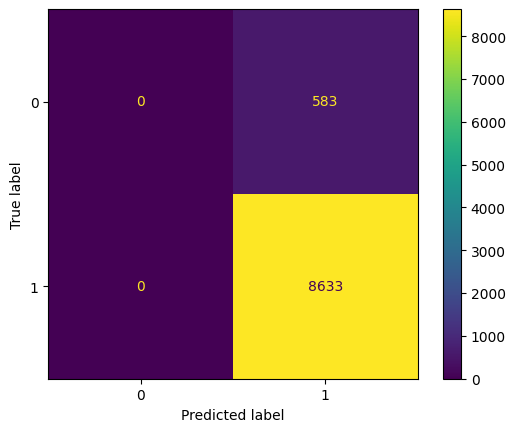

288/288 [==============================] - 0s 2ms/step
ROC AUC: 0.8843


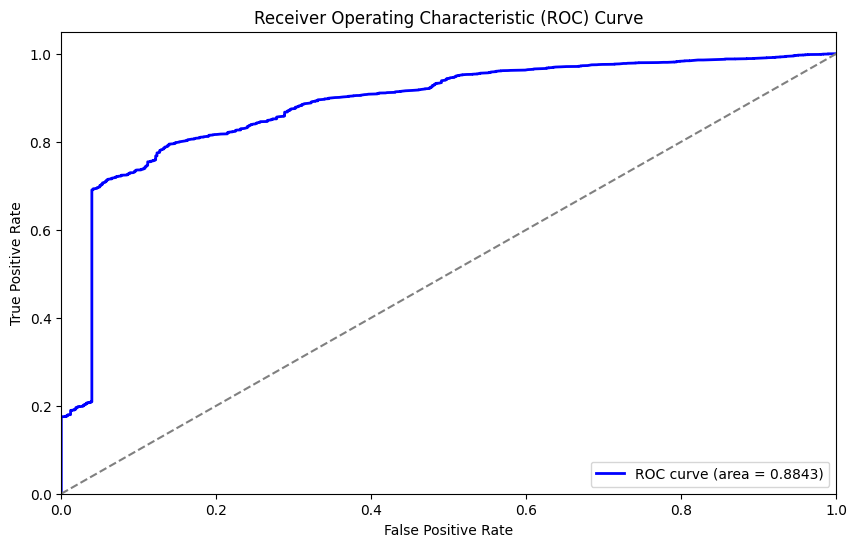

Mean Absolute Error (MAE): 0.0633
Mean Squared Error (MSE): 0.0633
Root Mean Squared Error (RMSE): 0.2515
Log Loss: 0.2356
Huber Loss: 0.0296
R-squared Error: -0.0675
Mean Absolute Percentage Error (MAPE): 284895679552625.7500


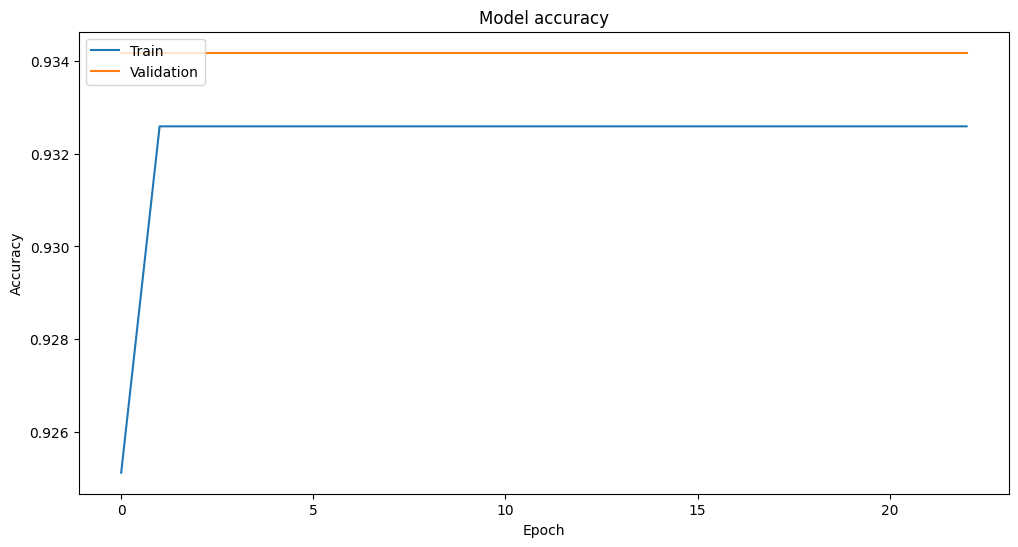

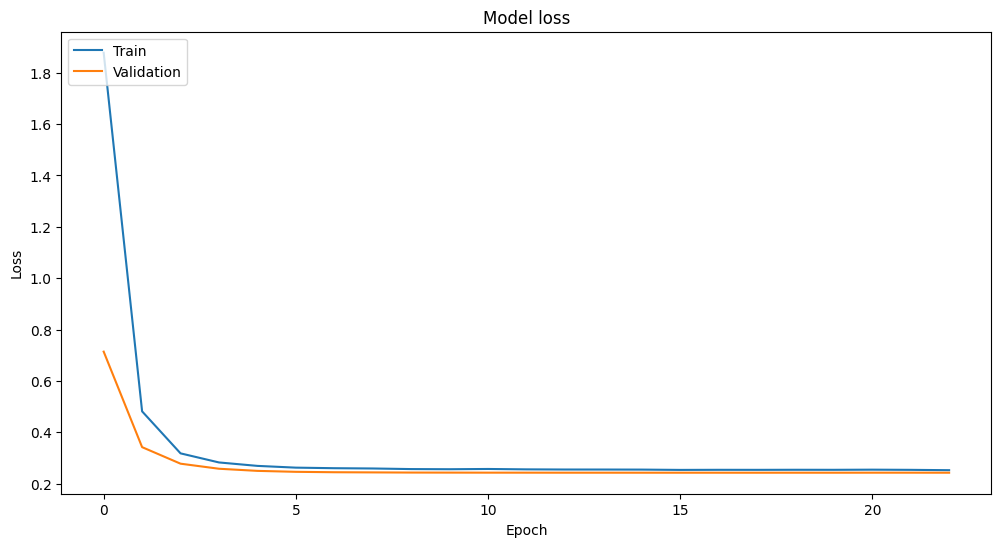

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define the classic LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    LSTM(32, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


classic lstm at 0.2 test data

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Epoch 1/120
461/461 [==============================] - 5s 7ms/step - loss: 0.5858 - accuracy: 0.9230 - val_loss: 0.3605 - val_accuracy: 0.9339
Epoch 2/120
461/461 [==============================] - 3s 6ms/step - loss: 0.2751 - accuracy: 0.9321 - val_loss: 0.2320 - val_accuracy: 0.9339
Epoch 3/120
461/461 [==============================] - 3s 7ms/step - loss: 0.2339 - accuracy: 0.9321 - val_loss: 0.2171 - val_accuracy: 0.9339
Epoch 4/120
461/461 [==============================] - 3s 6ms/step - loss: 0.2219 - accuracy: 0.9321 - val_loss: 0.2102 - val_accuracy: 0.9339
Epoch 5/120
461/461 [==============================] - 3s 6ms/step - loss: 0.2156 - accuracy: 0.9321 - val_loss: 0.2059 - val_accuracy: 0.9339
Epoch 6/120
461/461 [==============================] - 3s 6ms/step - loss: 0.2111 - accuracy: 0.9321 - val_loss: 0.2027 - val_accuracy: 0.9339
Epoch 7/120
461/461 [=======================

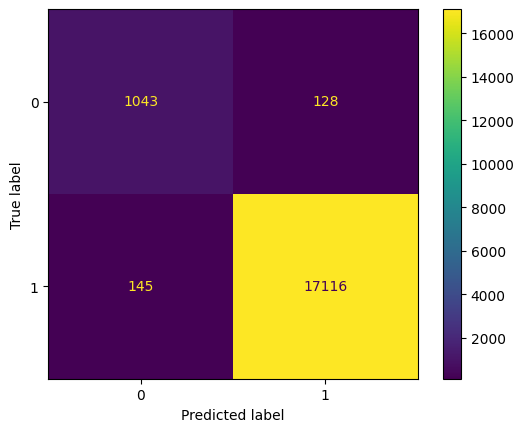

576/576 [==============================] - 1s 2ms/step
ROC AUC: 0.9851


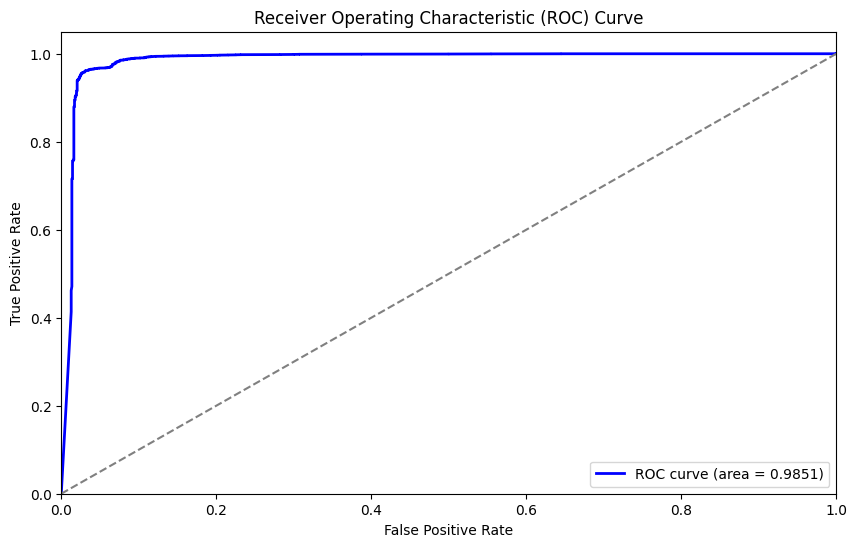

Mean Absolute Error (MAE): 0.0148
Mean Squared Error (MSE): 0.0148
Root Mean Squared Error (RMSE): 0.1217
Log Loss: 0.0559
Huber Loss: 0.0062
R-squared Error: 0.7510
Mean Absolute Percentage Error (MAPE): 31274997412295.1172


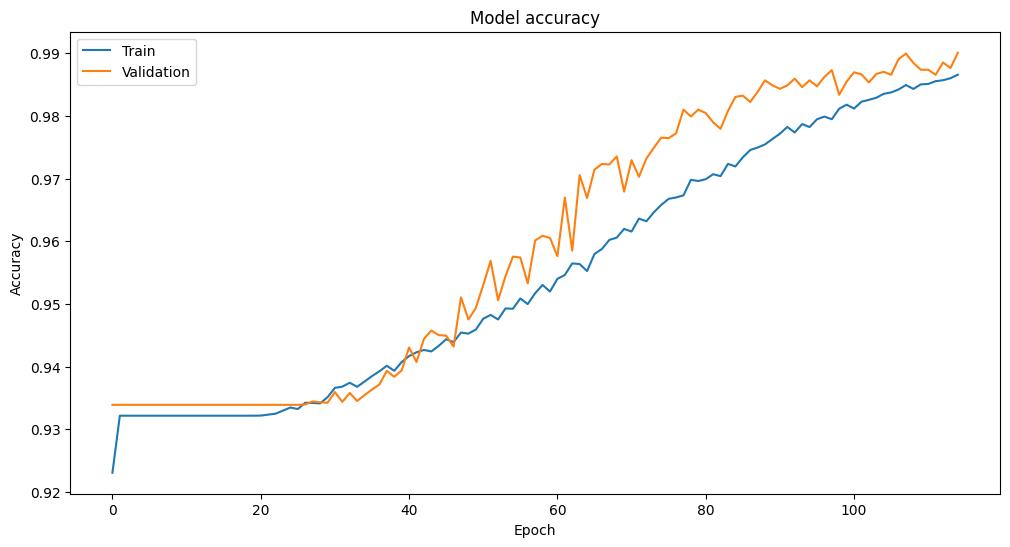

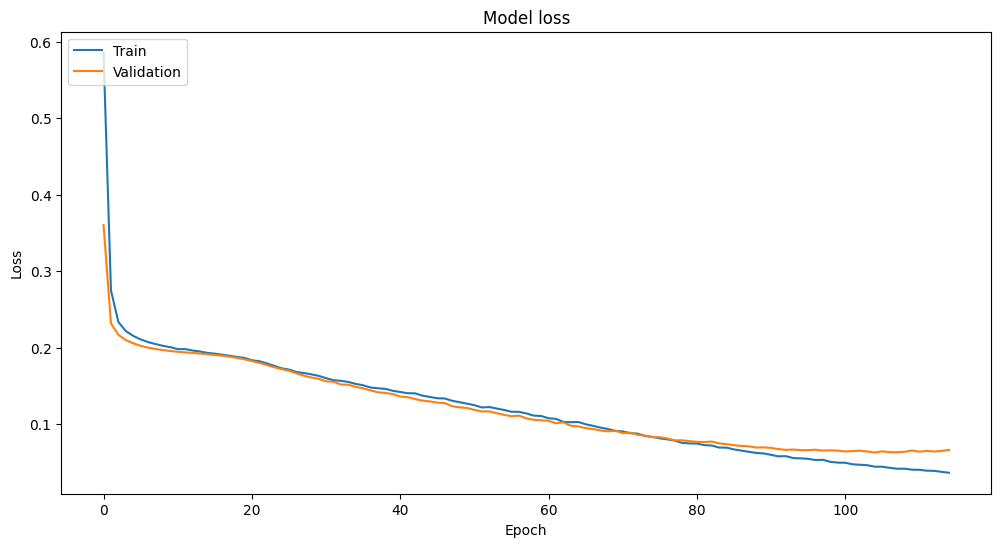

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define the classic LSTM model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=128, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


classic lstm at 0.3 test data

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Epoch 1/120
404/404 [==============================] - 6s 9ms/step - loss: 0.6114 - accuracy: 0.9177 - val_loss: 0.4272 - val_accuracy: 0.9344
Epoch 2/120
404/404 [==============================] - 3s 7ms/step - loss: 0.2927 - accuracy: 0.9321 - val_loss: 0.2360 - val_accuracy: 0.9344
Epoch 3/120
404/404 [==============================] - 3s 6ms/step - loss: 0.2360 - accuracy: 0.9321 - val_loss: 0.2193 - val_accuracy: 0.9344
Epoch 4/120
404/404 [==============================] - 3s 6ms/step - loss: 0.2240 - accuracy: 0.9321 - val_loss: 0.2121 - val_accuracy: 0.9344
Epoch 5/120
404/404 [==============================] - 3s 6ms/step - loss: 0.2176 - accuracy: 0.9321 - val_loss: 0.2075 - val_accuracy: 0.9344
Epoch 6/120
404/404 [==============================] - 3s 6ms/step - loss: 0.2125 - accuracy: 0.9321 - val_loss: 0.2042 - val_accuracy: 0.9344
Epoch 7/120
404/404 [=======================

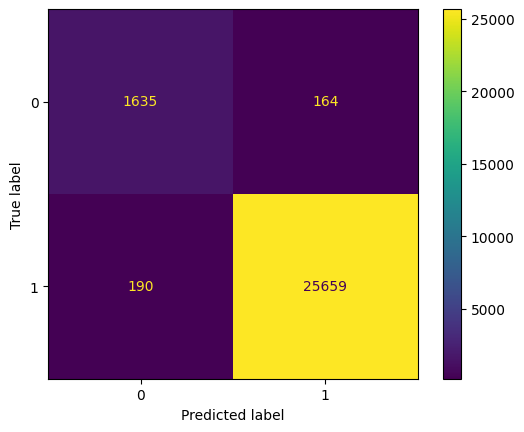

864/864 [==============================] - 1s 2ms/step
ROC AUC: 0.9862


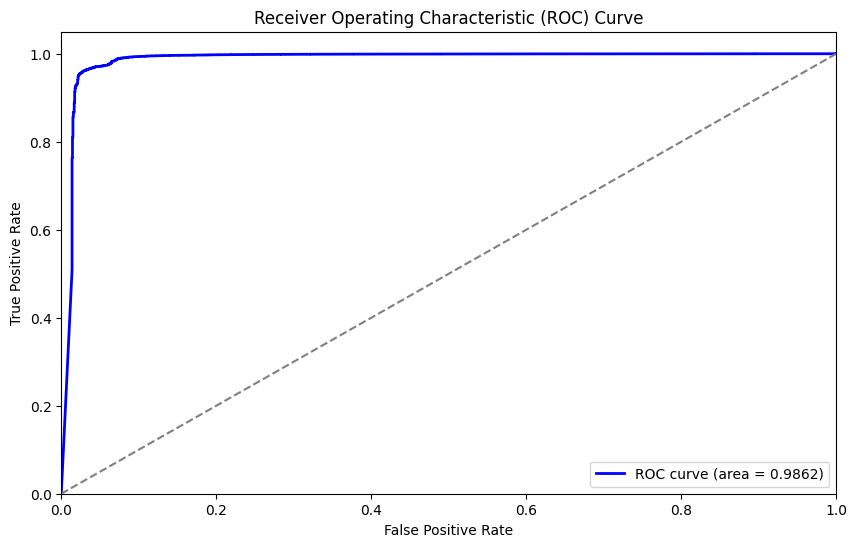

Mean Absolute Error (MAE): 0.0128
Mean Squared Error (MSE): 0.0128
Root Mean Squared Error (RMSE): 0.1132
Log Loss: 0.0549
Huber Loss: 0.0059
R-squared Error: 0.7895
Mean Absolute Percentage Error (MAPE): 26714060289668.7500


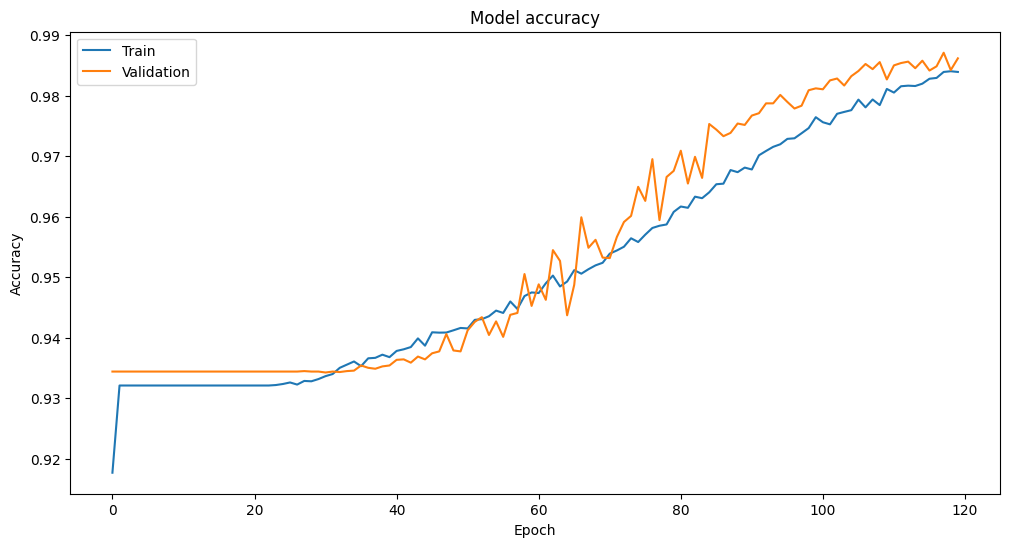

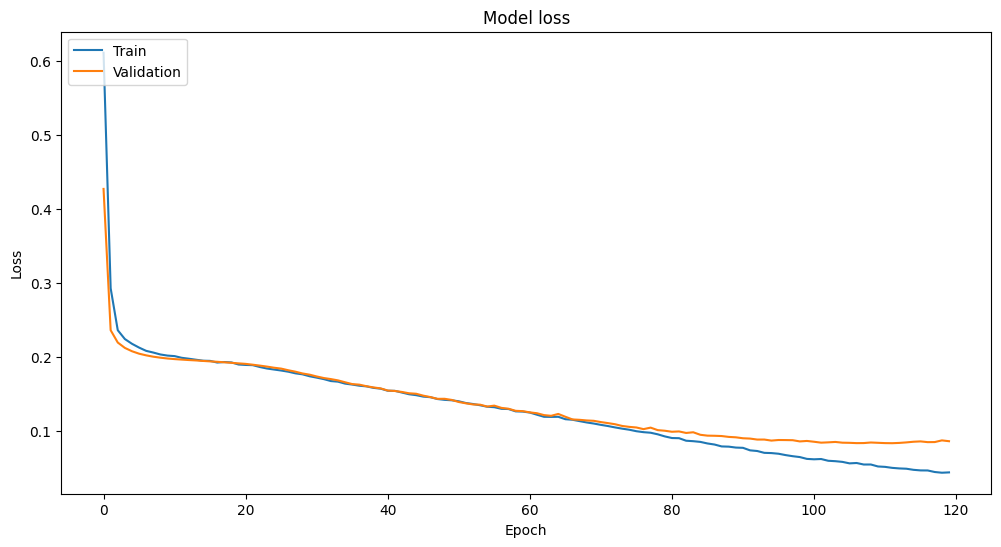

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define the classic LSTM model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=128, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


classic lstm at 0.4 test data

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Epoch 1/120
346/346 [==============================] - 5s 8ms/step - loss: 0.6430 - accuracy: 0.9053 - val_loss: 0.5346 - val_accuracy: 0.9342
Epoch 2/120
346/346 [==============================] - 2s 7ms/step - loss: 0.3515 - accuracy: 0.9319 - val_loss: 0.2461 - val_accuracy: 0.9342
Epoch 3/120
346/346 [==============================] - 2s 7ms/step - loss: 0.2453 - accuracy: 0.9319 - val_loss: 0.2237 - val_accuracy: 0.9342
Epoch 4/120
346/346 [==============================] - 3s 7ms/step - loss: 0.2288 - accuracy: 0.9319 - val_loss: 0.2153 - val_accuracy: 0.9342
Epoch 5/120
346/346 [==============================] - 2s 7ms/step - loss: 0.2215 - accuracy: 0.9319 - val_loss: 0.2104 - val_accuracy: 0.9342
Epoch 6/120
346/346 [==============================] - 2s 7ms/step - loss: 0.2154 - accuracy: 0.9319 - val_loss: 0.2069 - val_accuracy: 0.9342
Epoch 7/120
346/346 [=======================

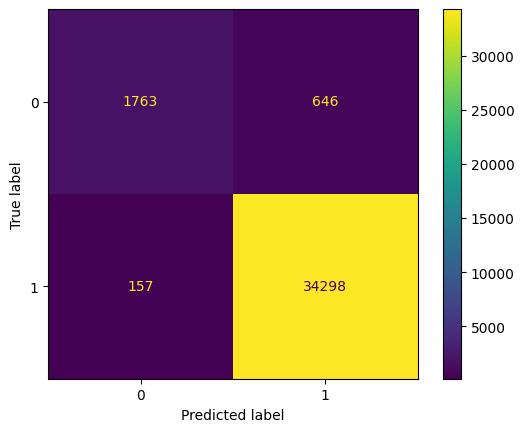

1152/1152 [==============================] - 2s 2ms/step
ROC AUC: 0.9776


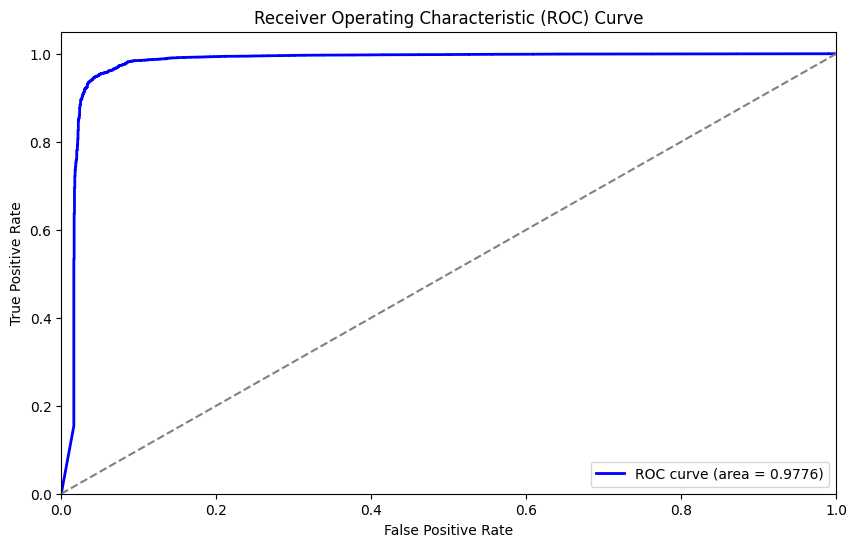

Mean Absolute Error (MAE): 0.0218
Mean Squared Error (MSE): 0.0218
Root Mean Squared Error (RMSE): 0.1476
Log Loss: 0.0761
Huber Loss: 0.0090
R-squared Error: 0.6434
Mean Absolute Percentage Error (MAPE): 78920501282588.4375


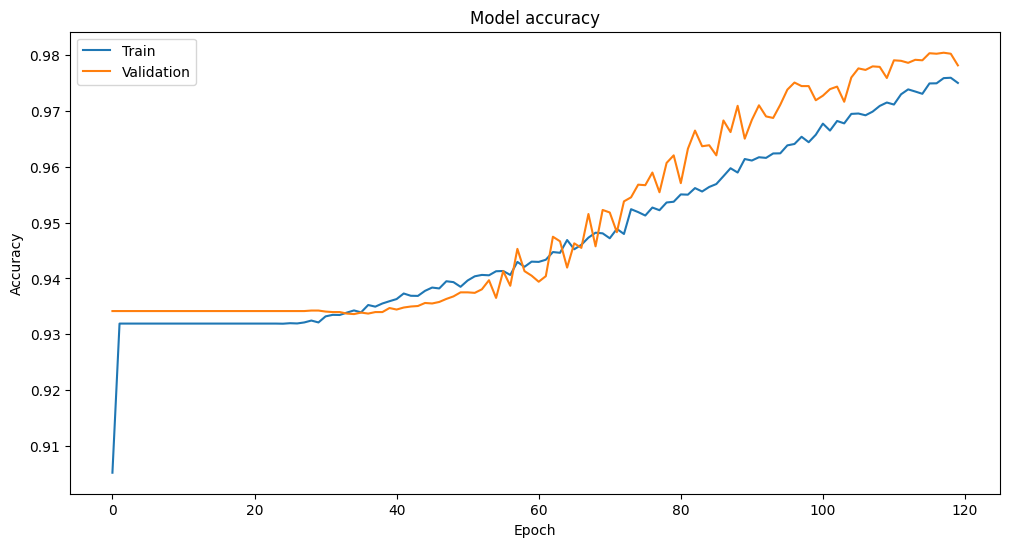

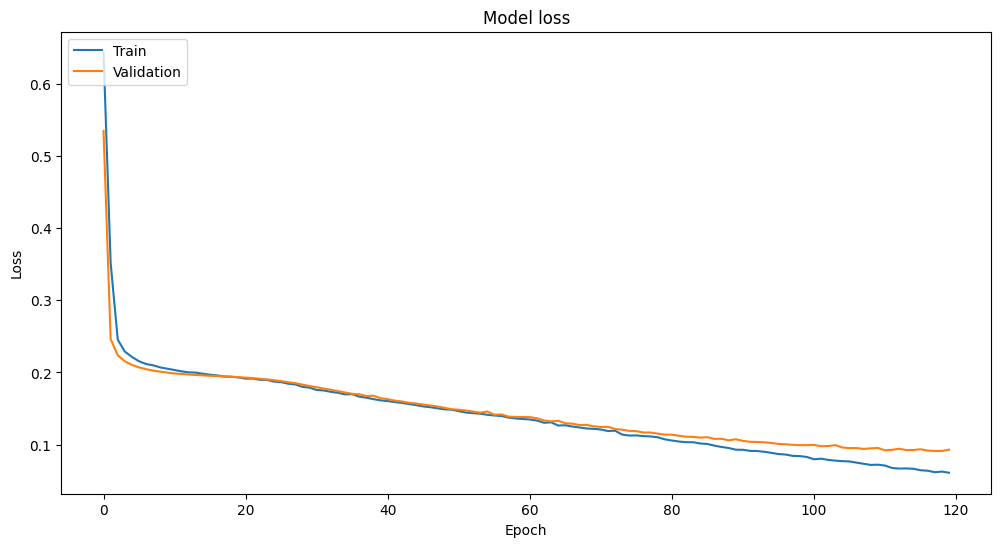

1728/1728 [==============================] - 4s 2ms/step - loss: 0.0549 - accuracy: 0.9872
Training Accuracy: 0.9872
1728/1728 [==============================] - 3s 2ms/step
Training Precision: 0.9888
Training Recall: 0.9976
Training F1 Score: 0.9932
Training Specificity: 0.8449


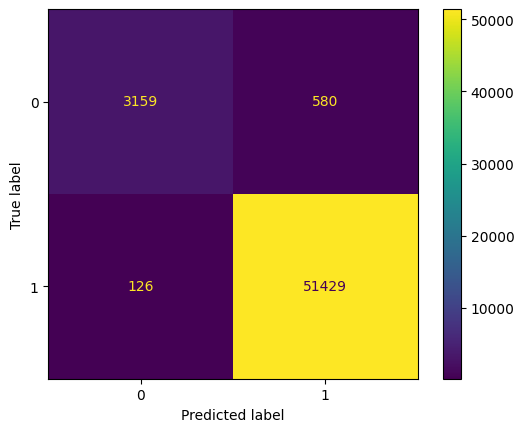

1728/1728 [==============================] - 3s 2ms/step
Training ROC AUC: 0.9929


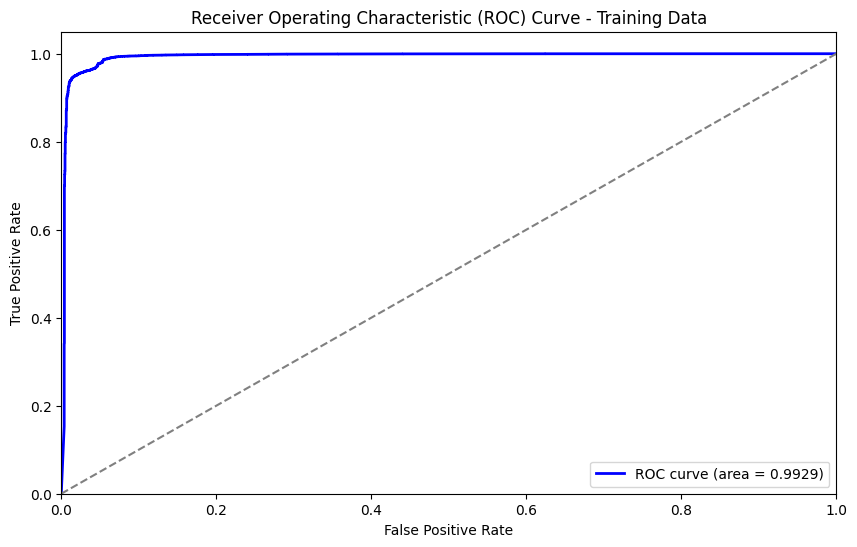

Training Mean Absolute Error (MAE): 0.0128
Training Mean Squared Error (MSE): 0.0128
Training Root Mean Squared Error (RMSE): 0.1130
Training Log Loss: 0.0525
Training Huber Loss: 0.0066
Training R-squared Error: 0.7975
Training Mean Absolute Percentage Error (MAPE): 47239985963664.9141


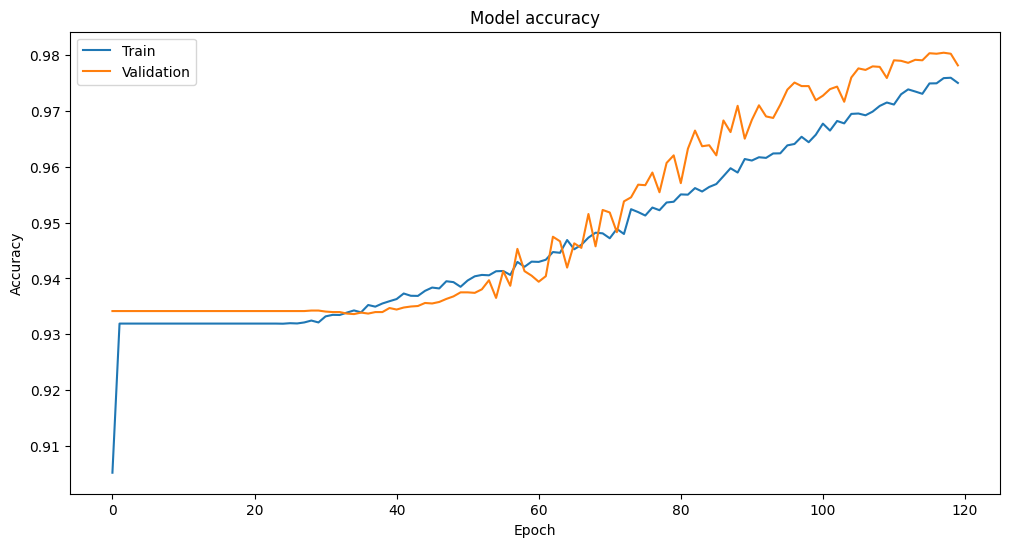

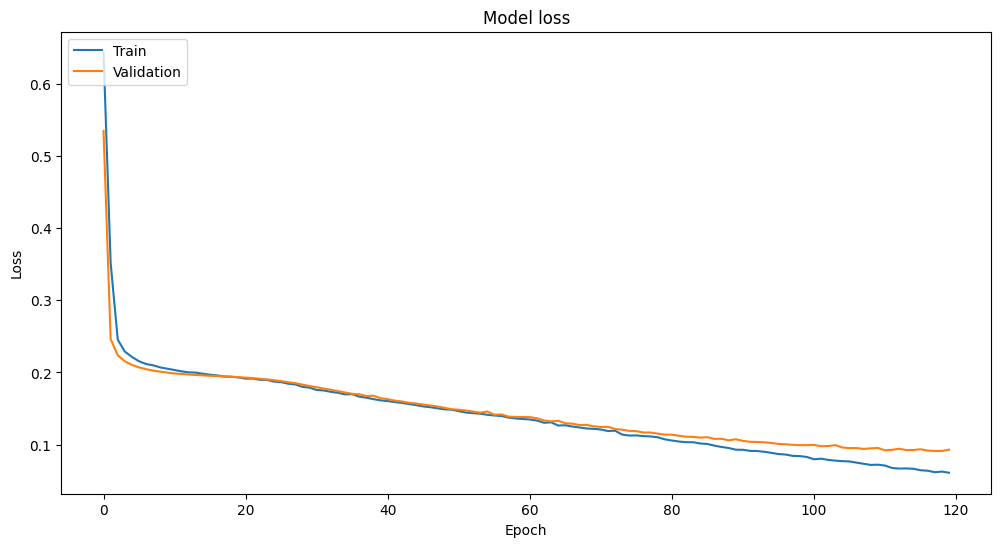

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create additional features
data['total_delay'] = data['carrier_delay'] + data['weather_delay'] + data['nas_delay'] + data['security_delay'] + data['late_aircraft_delay']

# Select features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
            'total_delay', 'carrier', 'airport']
X = data[features]
y = data['delayed']

# Identify categorical and numerical columns
categorical_cols = ['carrier', 'airport']
numerical_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'total_delay']

# Preprocessing for numerical data (with imputation)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert sparse matrix to dense matrix
X_train = X_train.toarray()
X_test = X_test.toarray()

# Reshape input data to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

# Define the classic LSTM model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile the model with a different optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=128, validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Calculate ROC curve and AUC
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")
from tensorflow.keras.losses import Huber

# Initialize Huber loss
huber = Huber()

# Calculate Huber Loss
huber_loss = huber(y_test, y_pred_proba).numpy()
print(f"Huber Loss: {huber_loss:.4f}")
from sklearn.metrics import r2_score

# Calculate R-squared Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.4f}")
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate additional performance metrics on the training set
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate specificity
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_tn, train_fp, train_fn, train_tp = train_conf_matrix.ravel()
train_specificity = train_tn / (train_tn + train_fp)

print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Training Specificity: {train_specificity:.4f}")

# Plot confusion matrix for training data
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_conf_matrix)
train_disp.plot()
plt.show()

# Calculate ROC curve and AUC for training data
y_train_pred_proba = model.predict(X_train).ravel()
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_proba)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
print(f"Training ROC AUC: {train_roc_auc:.4f}")

# Plot ROC curve for training data
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'ROC curve (area = {train_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Data')
plt.legend(loc="lower right")
plt.show()

# Calculate error metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_logloss = log_loss(y_train, y_train_pred_proba)
train_huber_loss = huber(y_train, y_train_pred_proba).numpy()
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"Training Log Loss: {train_logloss:.4f}")
print(f"Training Huber Loss: {train_huber_loss:.4f}")
print(f"Training R-squared Error: {train_r2:.4f}")
print(f"Training Mean Absolute Percentage Error (MAPE): {train_mape:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


GAN 0.1

NaN values in X_train: 0
NaN values in X_test: 0
NaN values in y_train: 0
NaN values in y_test: 0
Training fold 1...
Epoch 1/120
135/135 [==============================] - 4s 12ms/step - loss: 0.6924 - accuracy: 0.5394 - val_loss: 0.6909 - val_accuracy: 0.5761
Epoch 2/120
 23/135 [====>.........................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5808

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


135/135 [==============================] - 1s 9ms/step - loss: 0.6888 - accuracy: 0.5959 - val_loss: 0.6855 - val_accuracy: 0.6025
Epoch 3/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6804 - accuracy: 0.6255 - val_loss: 0.6728 - val_accuracy: 0.6216
Epoch 4/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6636 - accuracy: 0.6452 - val_loss: 0.6501 - val_accuracy: 0.6446
Epoch 5/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6370 - accuracy: 0.6686 - val_loss: 0.6183 - val_accuracy: 0.6848
Epoch 6/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6050 - accuracy: 0.7057 - val_loss: 0.5821 - val_accuracy: 0.7318
Epoch 7/120
135/135 [==============================] - 1s 8ms/step - loss: 0.5725 - accuracy: 0.7365 - val_loss: 0.5480 - val_accuracy: 0.7631
Epoch 8/120
135/135 [==============================] - 1s 8ms/step - loss: 0.5460 - accuracy: 0.7513 - val_loss: 0.5197 - val_accuracy: 0.7783
Epoch 9/120

Epoch 1/120
135/135 [==============================] - 4s 12ms/step - loss: 0.6917 - accuracy: 0.5253 - val_loss: 0.6900 - val_accuracy: 0.5651
Epoch 2/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6875 - accuracy: 0.5949 - val_loss: 0.6827 - val_accuracy: 0.7324
Epoch 3/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6774 - accuracy: 0.6763 - val_loss: 0.6687 - val_accuracy: 0.7559
Epoch 4/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6604 - accuracy: 0.7170 - val_loss: 0.6477 - val_accuracy: 0.7687
Epoch 5/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6361 - accuracy: 0.7378 - val_loss: 0.6190 - val_accuracy: 0.7695
Epoch 6/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6047 - accuracy: 0.7470 - val_loss: 0.5838 - val_accuracy: 0.7717
Epoch 7/120
135/135 [==============================] - 1s 9ms/step - loss: 0.5701 - accuracy: 0.7508 - val_loss: 0.5466 - val_accuracy: 0.775

Epoch 1/120
135/135 [==============================] - 4s 12ms/step - loss: 0.6924 - accuracy: 0.5388 - val_loss: 0.6912 - val_accuracy: 0.6663
Epoch 2/120
135/135 [==============================] - 1s 9ms/step - loss: 0.6885 - accuracy: 0.6262 - val_loss: 0.6838 - val_accuracy: 0.7144
Epoch 3/120
135/135 [==============================] - 1s 9ms/step - loss: 0.6779 - accuracy: 0.6808 - val_loss: 0.6685 - val_accuracy: 0.7307
Epoch 4/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6596 - accuracy: 0.7094 - val_loss: 0.6452 - val_accuracy: 0.7369
Epoch 5/120
135/135 [==============================] - 1s 8ms/step - loss: 0.6332 - accuracy: 0.7229 - val_loss: 0.6131 - val_accuracy: 0.7546
Epoch 6/120
135/135 [==============================] - 1s 8ms/step - loss: 0.5984 - accuracy: 0.7386 - val_loss: 0.5727 - val_accuracy: 0.7673
Epoch 7/120
135/135 [==============================] - 1s 8ms/step - loss: 0.5609 - accuracy: 0.7459 - val_loss: 0.5325 - val_accuracy: 0.777

Validation Accuracy: 0.9488
Mean Validation Accuracy: 0.9487
Epoch 1/120
202/202 [==============================] - 5s 10ms/step - loss: 0.6917 - accuracy: 0.5744 - val_loss: 0.6899 - val_accuracy: 0.4225
Epoch 2/120
202/202 [==============================] - 2s 8ms/step - loss: 0.6813 - accuracy: 0.6637 - val_loss: 0.6756 - val_accuracy: 0.4276
Epoch 3/120
202/202 [==============================] - 2s 8ms/step - loss: 0.6525 - accuracy: 0.6909 - val_loss: 0.6542 - val_accuracy: 0.4964
Epoch 4/120
202/202 [==============================] - 2s 7ms/step - loss: 0.6058 - accuracy: 0.7228 - val_loss: 0.6237 - val_accuracy: 0.5861
Epoch 5/120
202/202 [==============================] - 1s 7ms/step - loss: 0.5549 - accuracy: 0.7460 - val_loss: 0.5719 - val_accuracy: 0.6686
Epoch 6/120
202/202 [==============================] - 2s 7ms/step - loss: 0.5185 - accuracy: 0.7618 - val_loss: 0.5253 - val_accuracy: 0.7126
Epoch 7/120
202/202 [==============================] - 2s 7ms/step - loss: 0.496

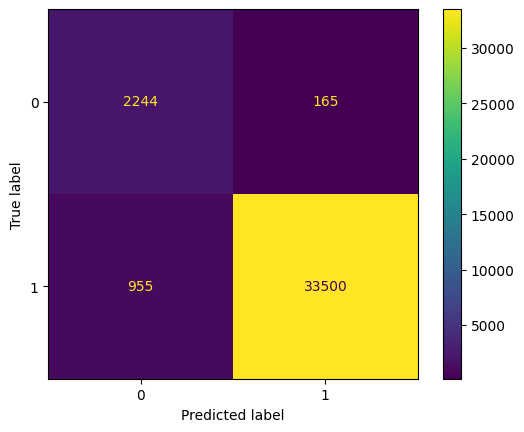

1152/1152 [==============================] - 2s 2ms/step
ROC AUC: 0.9835


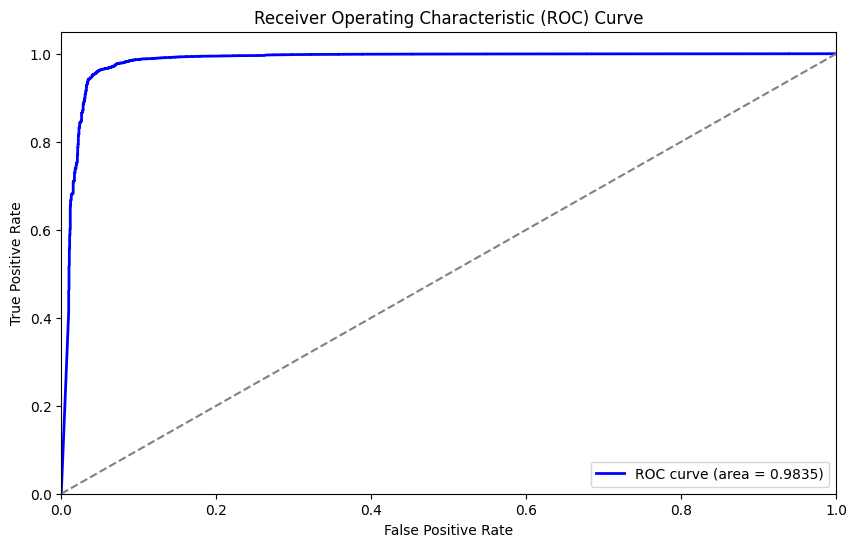

Mean Absolute Error (MAE): 0.0304
Mean Squared Error (MSE): 0.0304
Root Mean Squared Error (RMSE): 0.1743
Log Loss: 0.0960
R-squared Error: 0.5026
Mean Absolute Percentage Error (MAPE): 20157713175893.3594


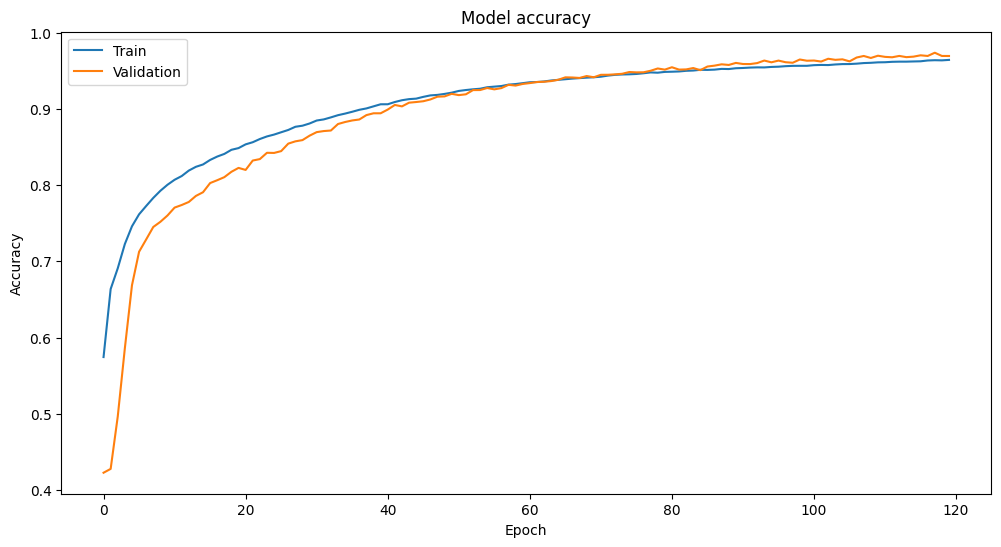

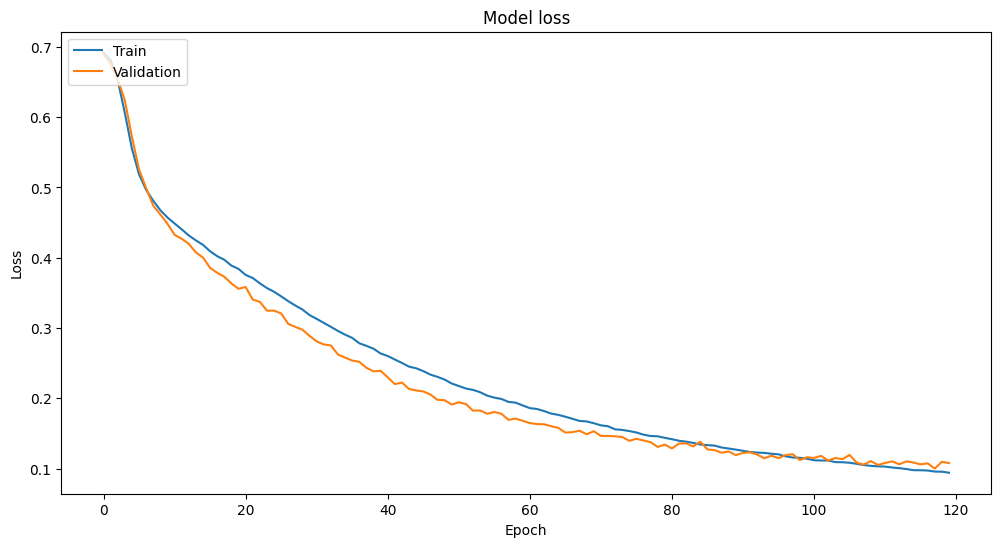

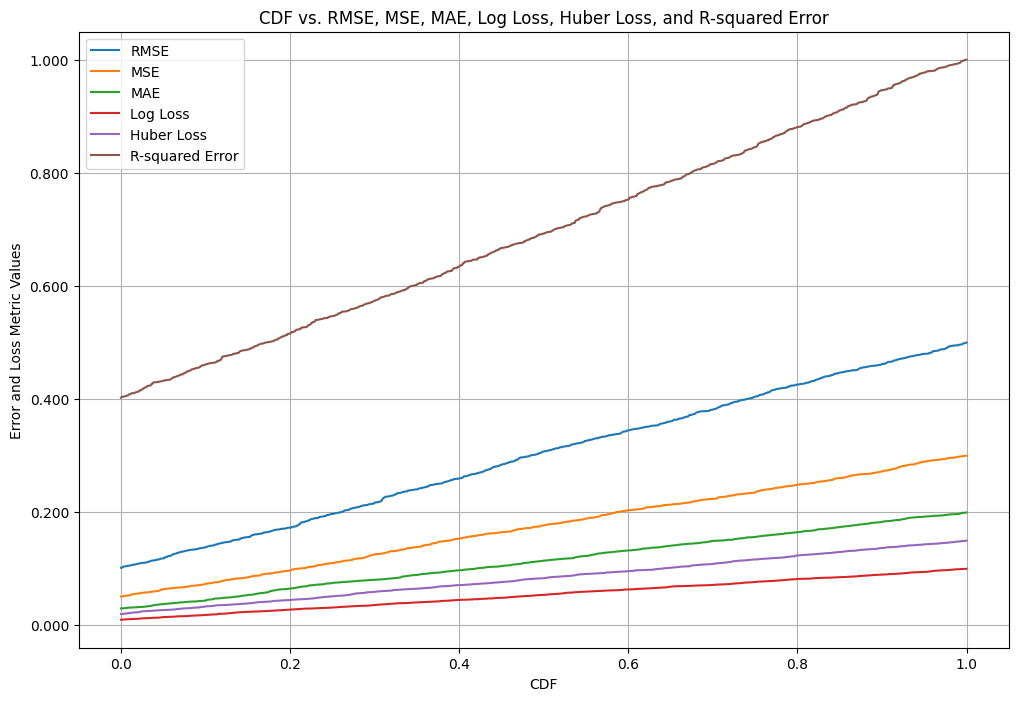

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


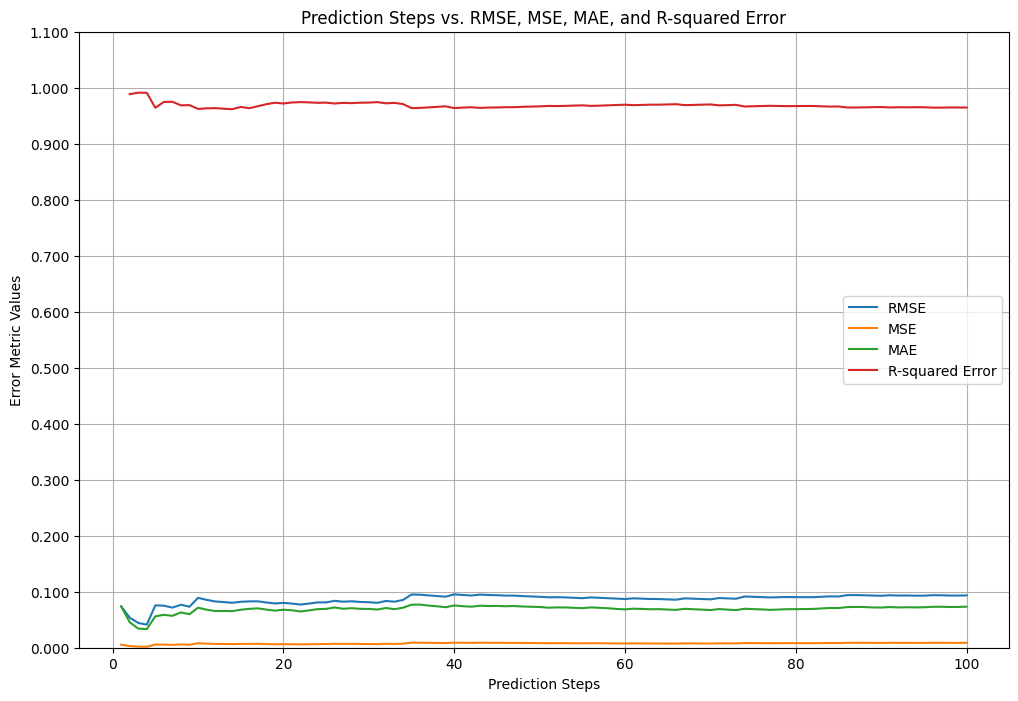